In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [326]:
data=pd.read_csv("Classification dataset.csv")
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [327]:
data.shape

(45211, 11)

In [328]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [330]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [331]:
from numpy.lib.arraysetops import unique
cat_cols=['job','marital','education_qual','call_type',"mon",'prev_outcome','y']
for column in cat_cols:
   # col=data.columns
  unique_types=data[column].value_counts()
  print("\nIndividual Counts of ",column,": ",unique_types)


Individual Counts of  job :  blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Individual Counts of  marital :  married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Individual Counts of  education_qual :  secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

Individual Counts of  call_type :  cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

Individual Counts of  mon :  may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

Individual Counts of  prev_outcome :  unknown    36959
failure     4901
other   

In [332]:
data.duplicated().sum()

6

In [333]:
data[data.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [334]:
data=data.drop_duplicates()

In [335]:
data.shape

(45205, 11)

# **Data Cleaning** **& EDA**
 



Text(0, 0.5, 'Count')

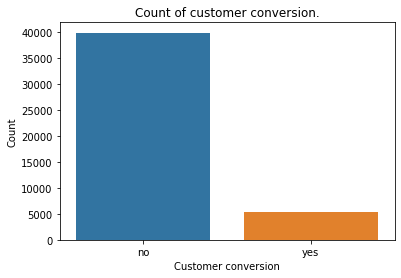

In [336]:
sns.countplot(data=data,x='y')
plt.title('Count of customer conversion.')
plt.xlabel('Customer conversion')
plt.ylabel('Count')

Data is imbalanced.

In [337]:
data.y=data.y.map({'yes':1,'no':0})

In [338]:
data.sample(7)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
23496,57,management,married,tertiary,cellular,28,aug,54,8,unknown,0
45127,67,blue-collar,married,secondary,cellular,27,oct,223,2,unknown,0
3951,32,blue-collar,married,primary,unknown,16,may,84,4,unknown,0
1661,51,unemployed,divorced,secondary,unknown,9,may,167,1,unknown,0
26379,30,blue-collar,married,secondary,cellular,20,nov,133,1,unknown,0
16828,37,entrepreneur,married,tertiary,cellular,24,jul,568,3,unknown,0
35792,28,blue-collar,single,secondary,cellular,8,may,191,3,unknown,0


## 1. Age column

In [339]:
# Checking for null values
data['age'].isnull().sum()

0

<AxesSubplot:xlabel='age'>

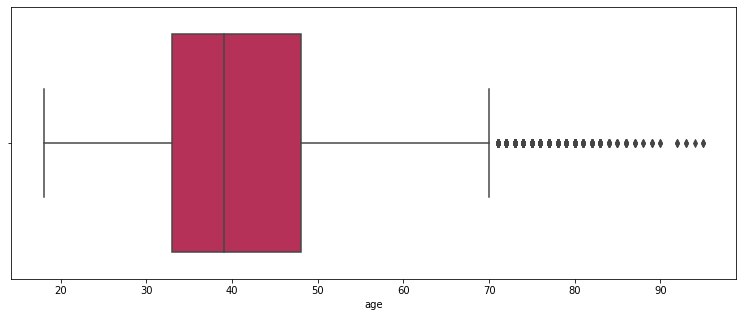

In [340]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='age',palette='rocket')

Ther are outliers !!

In [341]:
def outlier(feature):  # Method to detect and correct outliers
  
  # global abc
  iqr = data[feature].quantile(0.75)-data[feature].quantile(0.25)
  total=0
  upper_threshold=data[feature].quantile(0.75)+(1.5*iqr)
  lower_threshold=data[feature].quantile(0.25)-(1.5*iqr)
  print("U.Threshold: ",upper_threshold,"\nL.Threshold: ",lower_threshold)


  for i in data[feature][:]:
    if i>upper_threshold or i<lower_threshold:
      total+=1
      print("Outlier detected!: ",i)
      #data[feature] = data[feature].clip(lower_threshold,upper_threshold)


  return upper_threshold,lower_threshold,total

In [342]:
a,b,c=outlier('age')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(a,b,c))

U.Threshold:  70.5 
L.Threshold:  10.5
Outlier detected!:  83
Outlier detected!:  75
Outlier detected!:  75
Outlier detected!:  83
Outlier detected!:  75
Outlier detected!:  72
Outlier detected!:  71
Outlier detected!:  76
Outlier detected!:  83
Outlier detected!:  71
Outlier detected!:  85
Outlier detected!:  72
Outlier detected!:  90
Outlier detected!:  71
Outlier detected!:  82
Outlier detected!:  73
Outlier detected!:  74
Outlier detected!:  71
Outlier detected!:  75
Outlier detected!:  78
Outlier detected!:  85
Outlier detected!:  80
Outlier detected!:  71
Outlier detected!:  78
Outlier detected!:  73
Outlier detected!:  75
Outlier detected!:  94
Outlier detected!:  72
Outlier detected!:  83
Outlier detected!:  79
Outlier detected!:  78
Outlier detected!:  83
Outlier detected!:  73
Outlier detected!:  76
Outlier detected!:  83
Outlier detected!:  77
Outlier detected!:  73
Outlier detected!:  74
Outlier detected!:  73
Outlier detected!:  77
Outlier detected!:  71
Outlier detected!:

There are 487 outliers in the age column.

UTL = 70.5 

LTL = 10.5

In [343]:
age=data[['age','y']]
age_converted=age.query('y==1').shape[0]

In [344]:
total_conversion_rate_age=(age_converted/data.shape[0])*100
total_conversion_rate_age

11.700033182170113

In [345]:
age_outliers_converted=data.query('age>70.5 and y==1')
age_outliers_converted

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
29865,75,retired,divorced,primary,cellular,4,feb,136,3,unknown,1
31055,85,retired,married,primary,telephone,12,feb,165,2,unknown,1
31057,72,retired,married,tertiary,cellular,13,feb,99,1,unknown,1
31069,90,retired,divorced,secondary,cellular,13,feb,152,3,unknown,1
31077,71,retired,married,primary,cellular,16,feb,93,5,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
45109,78,management,married,unknown,cellular,25,oct,211,2,success,1
45191,75,retired,divorced,tertiary,cellular,16,nov,262,1,failure,1
45204,73,retired,married,secondary,cellular,17,nov,300,1,failure,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,1


In [346]:
conversion_rate_in_age_outliers=(age_outliers_converted.shape[0]/487)*100
conversion_rate_in_age_outliers

44.76386036960985

Conversion rate in the ***outliers of age*** column is 44.7%, where as in the ***age*** column it is 11.7% only. This is in line of our G.K. that old age people are more likely to subscribe to a policy.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Age')

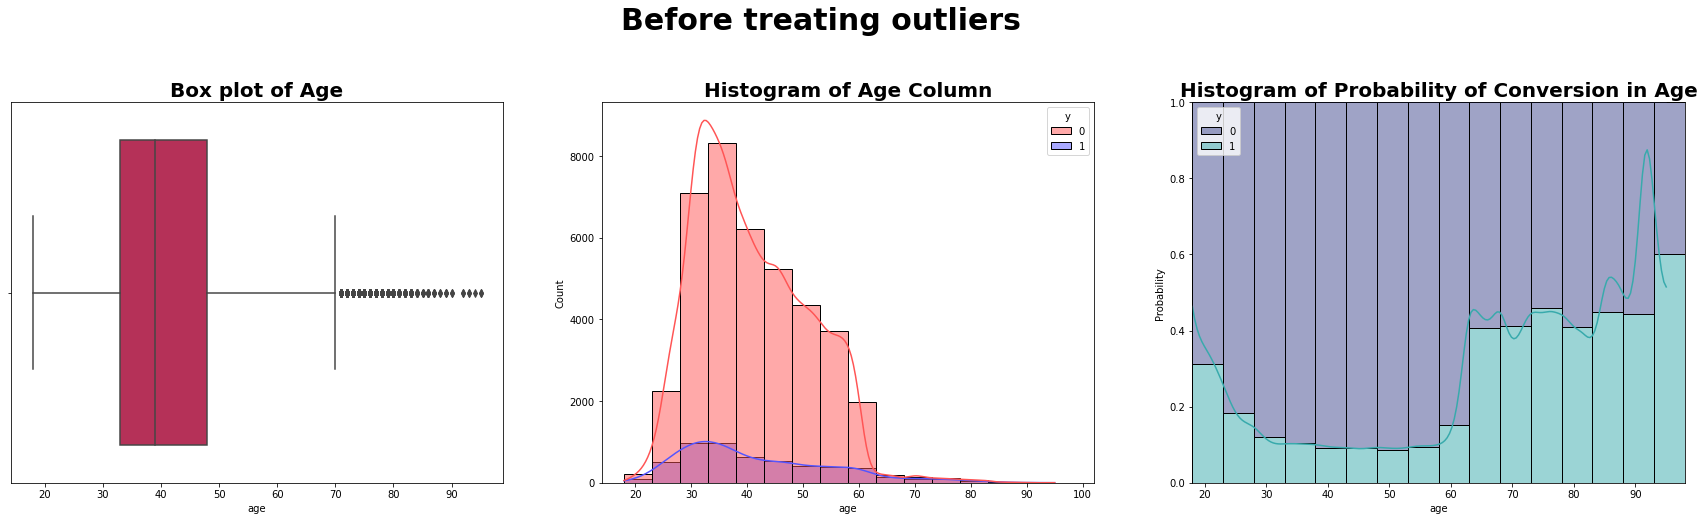

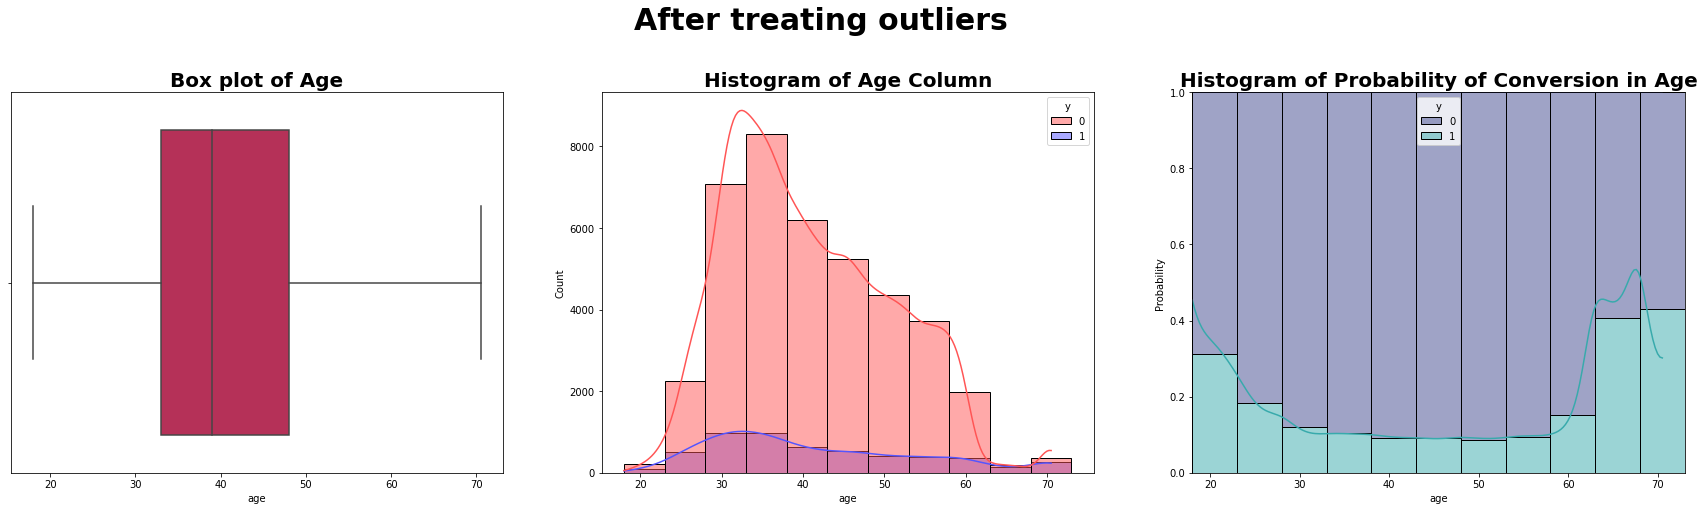

In [347]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='age',palette='rocket',ax=axes[0]).set_title("Box plot of Age",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='seismic_r',binwidth=5,kde=True,ax=axes[1]).set_title("Histogram of Age Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='mako',binwidth=5,kde=True,ax=axes[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Age",fontweight='bold',fontsize=20 )

data['age'] = data['age'].clip(10.5,70.5) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(30,7))
plt.suptitle("After treating outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='age',palette='rocket',ax=axes2[0]).set_title("Box plot of Age",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='seismic_r',binwidth=5,kde=True,ax=axes2[1]).set_title("Histogram of Age Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['age'],hue='y',palette='mako',binwidth=5,kde=True,ax=axes2[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Age",fontweight='bold',fontsize=20 )



From the above plots, though the count for age group 30 to 40 is high,probability of conversion is very low(around 0.1). Also for the age group 20 and 25 the probability of conversion lies in between 0.2 to 0.3 only. The businees firm has good scope in this age group to convert them to take a policy

## 2. Job column

In [348]:
data['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

**Univariation**

<AxesSubplot:xlabel='job', ylabel='count'>

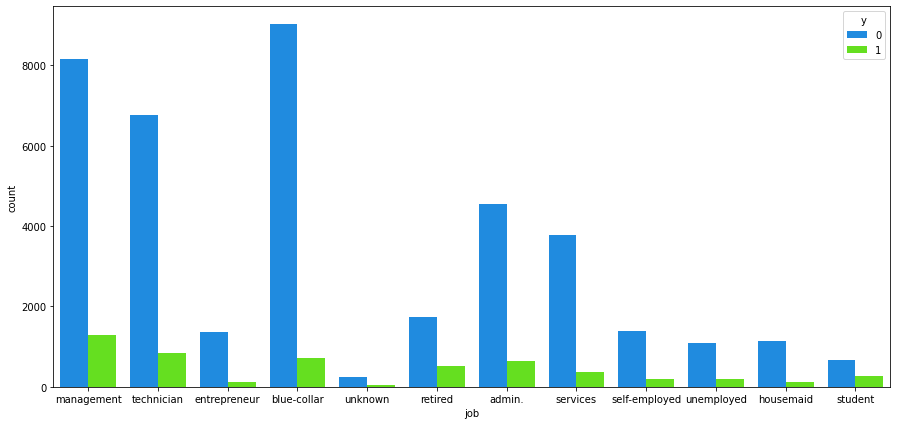

In [349]:
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='job',hue='y',palette='gist_rainbow_r')

In [350]:
jobs=pd.pivot_table(data=data,values='y',index='job').sort_values(by='y')
jobs['y']=jobs['y']*100
jobs

,y
job,
blue-collar,7.276465
entrepreneur,8.271688
housemaid,8.790323
services,8.885143
technician,11.058452
unknown,11.805556
self-employed,11.842939
admin.,12.205029
management,13.757005


In [351]:
jobs.index

Index(['blue-collar', 'entrepreneur', 'housemaid', 'services', 'technician',
       'unknown', 'self-employed', 'admin.', 'management', 'unemployed',
       'retired', 'student'],
      dtype='object', name='job')

**Bi-variation**

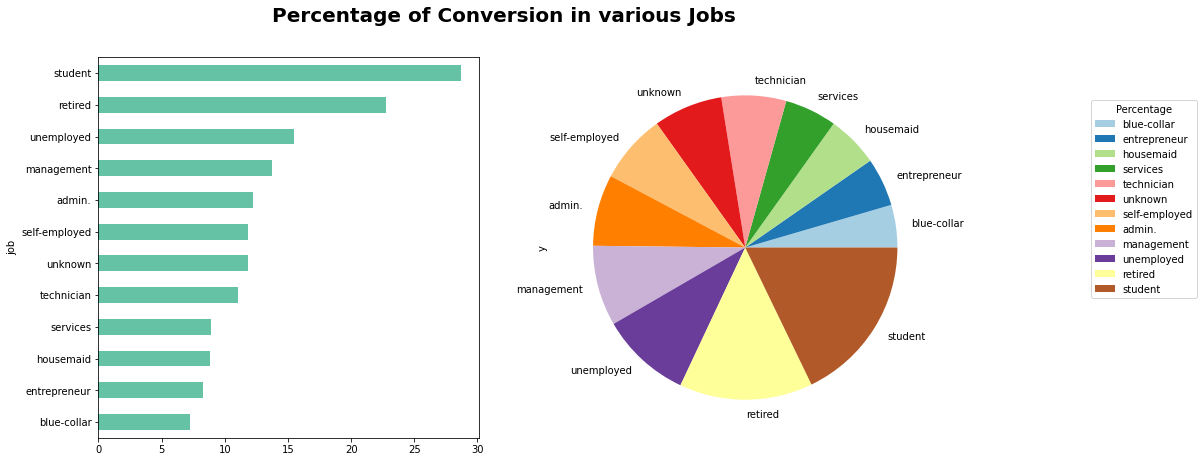

In [352]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.suptitle("Percentage of Conversion in various Jobs",fontweight='bold',fontsize=20)


jobs.plot(kind='barh',ax=axes[0],legend=None,cmap='Set2')
jobs.plot(kind='pie',subplots=True,ax=axes[1],cmap="Paired")
plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')


([], [])

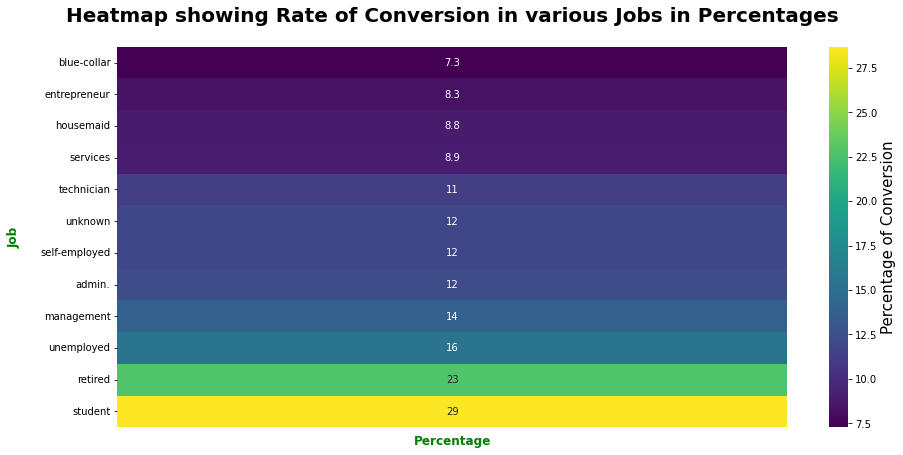

In [353]:
plt.figure(figsize=(15,7))
sns.heatmap(data=jobs,annot=True,cmap='viridis',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(15)
plt.title("Heatmap showing Rate of Conversion in various Jobs in Percentages",fontsize=20,fontweight='bold',pad=25)
plt.xlabel("Percentage",fontsize=12,fontweight='bold',color='green')
plt.ylabel("Job",fontsize=12,labelpad=20,fontweight='bold',color='green')
plt.xticks([])


In [354]:
# Jobs=data.groupby('job')['y'].mean().sort_values()
# Jobs.reset_index()

**Multi-variation**

Text(0.5, 0, 'Duration')

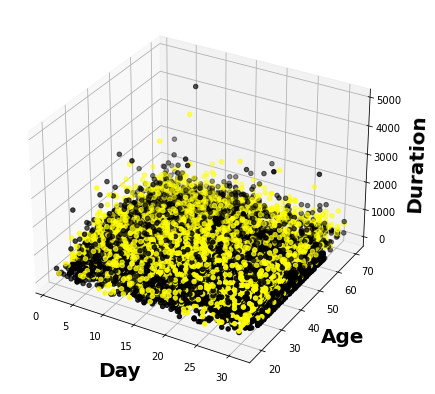

In [355]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
ax = plt.axes(projection ='3d')

y=data['age']
z=data['dur']
x=data['day']
c=data['y']

ax.scatter(x,y,z,c=c,cmap='gnuplot')

plt.xlabel("Day",fontweight='bold',fontsize=20,labelpad=10)
plt.ylabel("Age",fontweight='bold',fontsize=20,labelpad=10)
ax.set_zlabel("Duration",fontweight='bold',fontsize=20,labelpad=10)



Couldn't able to draw any inference from the above 3D plot 😥

In [356]:
jobs_N_marital=data.pivot_table(index='marital',columns='job',values='y')
jobs_N_marital

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,0.120000,0.077333,0.083799,0.097826,0.127813,0.284706,0.157143,0.091075,0.166667,0.083243,0.157895,0.058824
married,0.113628,0.062733,0.075701,0.073465,0.126134,0.220682,0.079557,0.073982,0.185185,0.102665,0.132695,0.103448
single,0.136074,0.105760,0.113445,0.166667,0.162199,0.120370,0.192825,0.117696,0.293850,0.132493,0.194514,0.176471


In [357]:
jobs_N_marital=jobs_N_marital.apply(lambda x: x*100)
jobs_N_marital


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,12.000000,7.733333,8.379888,9.782609,12.781278,28.470588,15.714286,9.107468,16.666667,8.324324,15.789474,5.882353
married,11.362792,6.273328,7.570093,7.346491,12.613447,22.068169,7.955690,7.398171,18.518519,10.266535,13.269494,10.344828
single,13.607412,10.575968,11.344538,16.666667,16.219885,12.037037,19.282511,11.769616,29.384966,13.249332,19.451372,17.647059


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'divorced'), Text(0, 1.5, 'married'), Text(0, 2.5, 'single')])

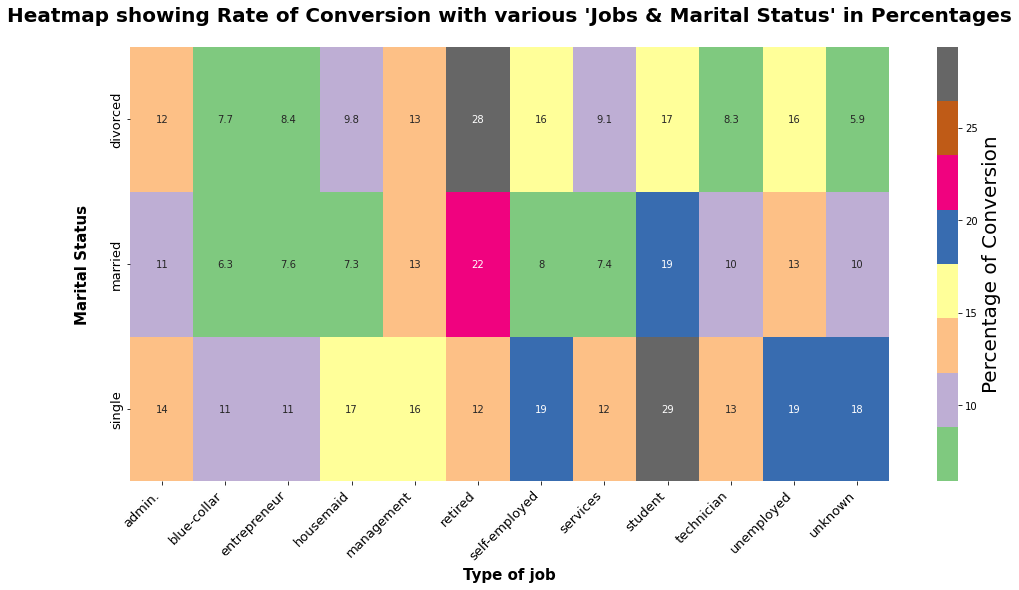

In [358]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_marital,annot=True,cmap='Accent',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Marital Status' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Marital Status",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [359]:
jobs_N_qualification=data.pivot_table(index='education_qual',columns='job',values='y')
jobs_N_qualification

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education_qual,,,,,,,,,,,,
primary,0.057416,0.058025,0.065574,0.078150,0.074830,0.223899,0.038462,0.084058,0.363636,0.082278,0.132296,0.058824
secondary,0.119014,0.080633,0.095941,0.086076,0.086530,0.210366,0.074523,0.085648,0.297244,0.099063,0.148352,0.126761
tertiary,0.173077,0.161074,0.075802,0.127168,0.145385,0.275956,0.160864,0.123762,0.264574,0.145399,0.193772,0.102564
unknown,0.105263,0.072687,0.092105,0.088889,0.198347,0.252101,0.128205,0.126667,0.263804,0.095041,0.137931,0.141732


In [360]:
jobs_N_qualification=jobs_N_qualification.apply(lambda x: x*100)
jobs_N_qualification

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education_qual,,,,,,,,,,,,
primary,5.741627,5.802502,6.557377,7.814992,7.482993,22.389937,3.846154,8.405797,36.363636,8.227848,13.229572,5.882353
secondary,11.901375,8.063315,9.594096,8.607595,8.652988,21.036585,7.452340,8.564815,29.724409,9.906292,14.835165,12.676056
tertiary,17.307692,16.107383,7.580175,12.716763,14.538462,27.595628,16.086435,12.376238,26.457399,14.539908,19.377163,10.256410
unknown,10.526316,7.268722,9.210526,8.888889,19.834711,25.210084,12.820513,12.666667,26.380368,9.504132,13.793103,14.173228


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'primary'),
  Text(0, 1.5, 'secondary'),
  Text(0, 2.5, 'tertiary'),
  Text(0, 3.5, 'unknown')])

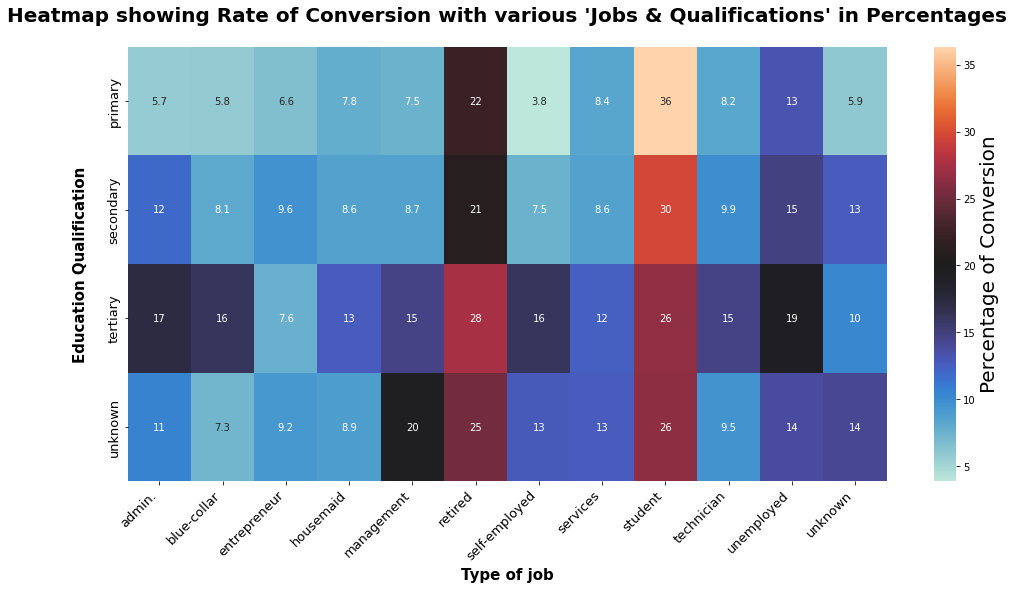

In [361]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_qualification,annot=True,cmap='icefire',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Qualifications' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Education Qualification",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)


In [362]:
jobs_N_calltype=data.pivot_table(index='call_type',columns='job',values='y')
jobs_N_calltype

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
call_type,,,,,,,,,,,,
cellular,0.157722,0.099709,0.093291,0.112299,0.164387,0.267153,0.141144,0.121297,0.352941,0.135874,0.194164,0.206107
telephone,0.141869,0.062193,0.183908,0.092715,0.127389,0.318519,0.122449,0.070175,0.191919,0.084112,0.130000,0.108696
unknown,0.039948,0.039354,0.040359,0.032258,0.044252,0.042945,0.055416,0.035039,0.028169,0.043272,0.051282,0.018018


In [363]:
jobs_N_calltype=jobs_N_calltype.apply(lambda x: x*100)
jobs_N_calltype


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
call_type,,,,,,,,,,,,
cellular,15.772212,9.970902,9.329140,11.229947,16.438746,26.715328,14.114391,12.129704,35.294118,13.587361,19.416386,20.610687
telephone,14.186851,6.219313,18.390805,9.271523,12.738854,31.851852,12.244898,7.017544,19.191919,8.411215,13.000000,10.869565
unknown,3.994761,3.935419,4.035874,3.225806,4.425229,4.294479,5.541562,3.503854,2.816901,4.327177,5.128205,1.801802


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'cellular'),
  Text(0, 1.5, 'telephone'),
  Text(0, 2.5, 'unknown')])

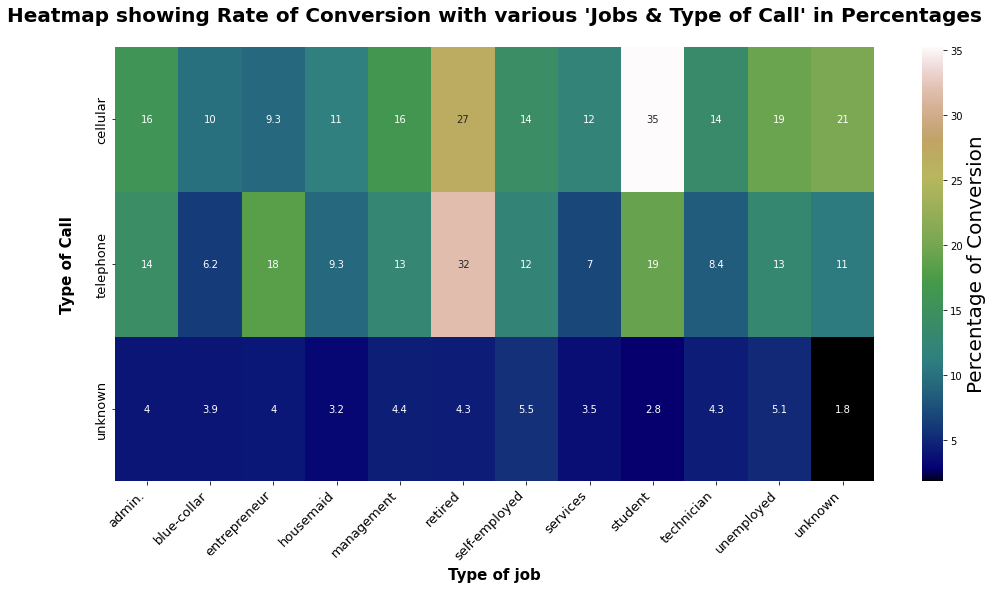

In [364]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_calltype,annot=True,cmap='gist_earth',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Type of Call' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Type of Call",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [365]:
jobs_N_month=data.pivot_table(index='job',columns='mon',values='y')
jobs_N_month

mon,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
job,,,,,,,,,,,,
admin.,0.168317,0.168975,0.521739,0.156051,0.112360,0.079219,0.123939,0.418919,0.075957,0.099526,0.352381,0.461538
blue-collar,0.102258,0.098522,0.416667,0.079404,0.059459,0.081004,0.069586,0.416667,0.051850,0.076412,0.355932,0.548387
entrepreneur,0.128571,0.134146,0.333333,0.114943,0.052632,0.096026,0.060185,1.000000,0.043269,0.068826,0.416667,0.500000
housemaid,0.196078,0.068966,0.333333,0.117647,0.062500,0.063830,0.051471,0.538462,0.072848,0.086420,0.384615,0.285714
management,0.276173,0.106727,0.490196,0.201802,0.072414,0.088083,0.145946,0.576389,0.077952,0.094891,0.474576,0.502959
retired,0.337931,0.168798,0.512195,0.363095,0.269663,0.144543,0.118812,0.560606,0.121469,0.255474,0.373134,0.463918
self-employed,0.267442,0.112676,0.333333,0.123810,0.094340,0.085020,0.107981,0.562500,0.073770,0.093617,0.538462,0.307692
services,0.100000,0.112360,0.533333,0.085714,0.096296,0.076031,0.088975,0.700000,0.061674,0.092409,0.650000,0.666667
student,0.382022,0.300000,0.411765,0.333333,0.205128,0.416667,0.211765,0.384615,0.142292,0.365385,0.512821,0.360000


In [366]:
jobs_N_month=jobs_N_month.apply(lambda x: x*100)
jobs_N_month

mon,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
job,,,,,,,,,,,,
admin.,16.831683,16.897507,52.173913,15.605096,11.235955,7.921929,12.393888,41.891892,7.595660,9.952607,35.238095,46.153846
blue-collar,10.225764,9.852217,41.666667,7.940447,5.945946,8.100358,6.958561,41.666667,5.185016,7.641196,35.593220,54.838710
entrepreneur,12.857143,13.414634,33.333333,11.494253,5.263158,9.602649,6.018519,100.000000,4.326923,6.882591,41.666667,50.000000
housemaid,19.607843,6.896552,33.333333,11.764706,6.250000,6.382979,5.147059,53.846154,7.284768,8.641975,38.461538,28.571429
management,27.617329,10.672736,49.019608,20.180180,7.241379,8.808290,14.594595,57.638889,7.795203,9.489051,47.457627,50.295858
retired,33.793103,16.879795,51.219512,36.309524,26.966292,14.454277,11.881188,56.060606,12.146893,25.547445,37.313433,46.391753
self-employed,26.744186,11.267606,33.333333,12.380952,9.433962,8.502024,10.798122,56.250000,7.377049,9.361702,53.846154,30.769231
services,10.000000,11.235955,53.333333,8.571429,9.629630,7.603093,8.897485,70.000000,6.167401,9.240924,65.000000,66.666667
student,38.202247,30.000000,41.176471,33.333333,20.512821,41.666667,21.176471,38.461538,14.229249,36.538462,51.282051,36.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'admin.'),
  Text(0, 1.5, 'blue-collar'),
  Text(0, 2.5, 'entrepreneur'),
  Text(0, 3.5, 'housemaid'),
  Text(0, 4.5, 'management'),
  Text(0, 5.5, 'retired'),
  Text(0, 6.5, 'self-employed'),
  Text(0, 7.5, 'services'),
  Text(0, 8.5, 'student'),
  Text(0, 9.5, 'technician'),
  Text(0, 10.5, 'unemployed'),
  Text(0, 11.5, 'unknown')])

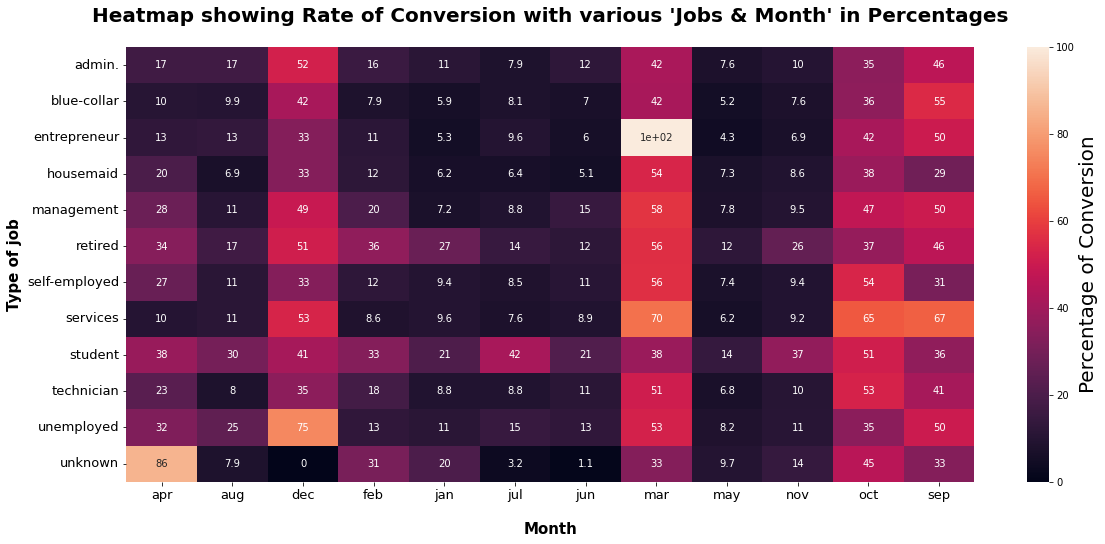

In [367]:
plt.figure(figsize=(19,8))

sns.heatmap(data=jobs_N_month,annot=True,cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Month' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.ylabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13)
plt.xlabel("Month",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

In [368]:
jobs_N_previousOutcome=data.pivot_table(index='prev_outcome',columns='job',values='y')
jobs_N_previousOutcome

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
prev_outcome,,,,,,,,,,,,
failure,0.133748,0.059925,0.091463,0.134021,0.160920,0.221739,0.096970,0.094595,0.290598,0.124216,0.214286,0.300000
other,0.165975,0.087282,0.076923,0.153846,0.223919,0.349398,0.213115,0.101695,0.283951,0.150502,0.216216,0.500000
success,0.598039,0.574324,0.409091,0.586207,0.687339,0.718391,0.654545,0.694118,0.712644,0.563265,0.781250,0.818182
unknown,0.093827,0.064588,0.076070,0.068934,0.102057,0.175014,0.093991,0.072527,0.229709,0.089209,0.110092,0.070588


In [369]:
jobs_N_previousOutcome=jobs_N_previousOutcome.apply(lambda x: x*100)
jobs_N_previousOutcome

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
prev_outcome,,,,,,,,,,,,
failure,13.374806,5.992509,9.146341,13.402062,16.091954,22.173913,9.696970,9.459459,29.059829,12.421581,21.428571,30.000000
other,16.597510,8.728180,7.692308,15.384615,22.391858,34.939759,21.311475,10.169492,28.395062,15.050167,21.621622,50.000000
success,59.803922,57.432432,40.909091,58.620690,68.733850,71.839080,65.454545,69.411765,71.264368,56.326531,78.125000,81.818182
unknown,9.382656,6.458770,7.606973,6.893382,10.205686,17.501407,9.399076,7.252683,22.970904,8.920863,11.009174,7.058824


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'failure'),
  Text(0, 1.5, 'other'),
  Text(0, 2.5, 'success'),
  Text(0, 3.5, 'unknown')])

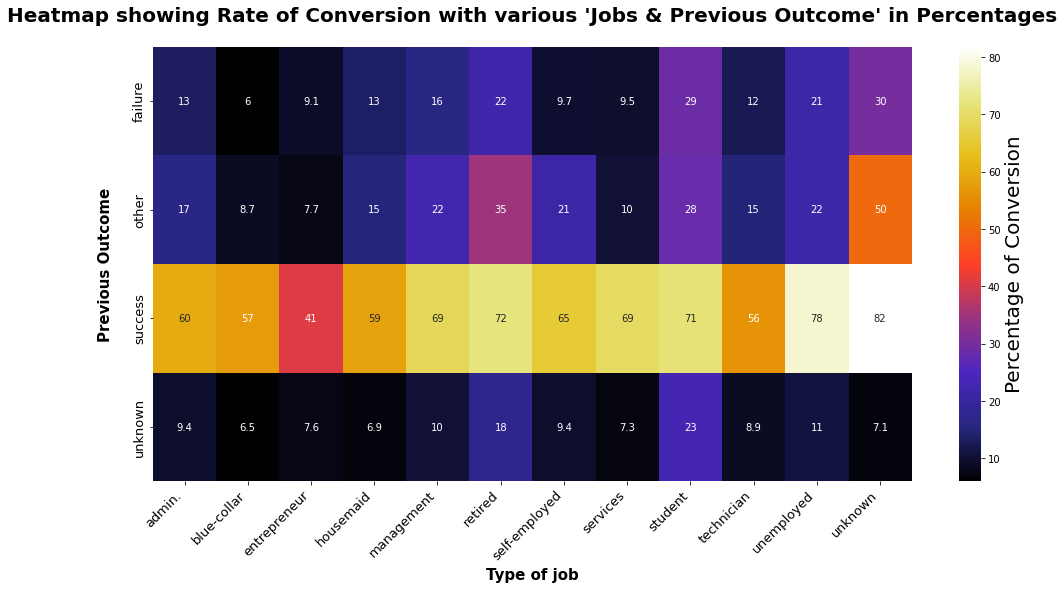

In [370]:
plt.figure(figsize=(17,8))

sns.heatmap(data=jobs_N_previousOutcome,annot=True,cmap='CMRmap',cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)
plt.title("Heatmap showing Rate of Conversion with various 'Jobs & Previous Outcome' in Percentages",fontsize=20,fontweight='bold',pad=25)

plt.xlabel("Type of job",fontsize=15,fontweight='bold',labelpad=5)
plt.xticks(fontsize=13,rotation=45,ha='right')
plt.ylabel("Previous Outcome",fontsize=15,fontweight='bold',labelpad=20)
plt.yticks(fontsize=13)

## 6. Day Column

In [371]:
# Checking for null values
data['day'].isnull().sum()

0

<AxesSubplot:xlabel='day'>

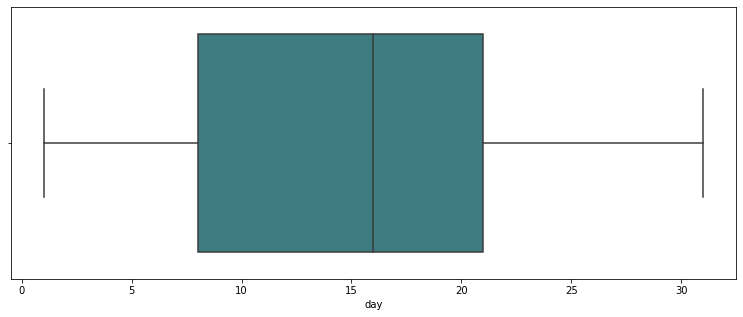

In [372]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='day',palette='crest')

There are no outliers.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Day')

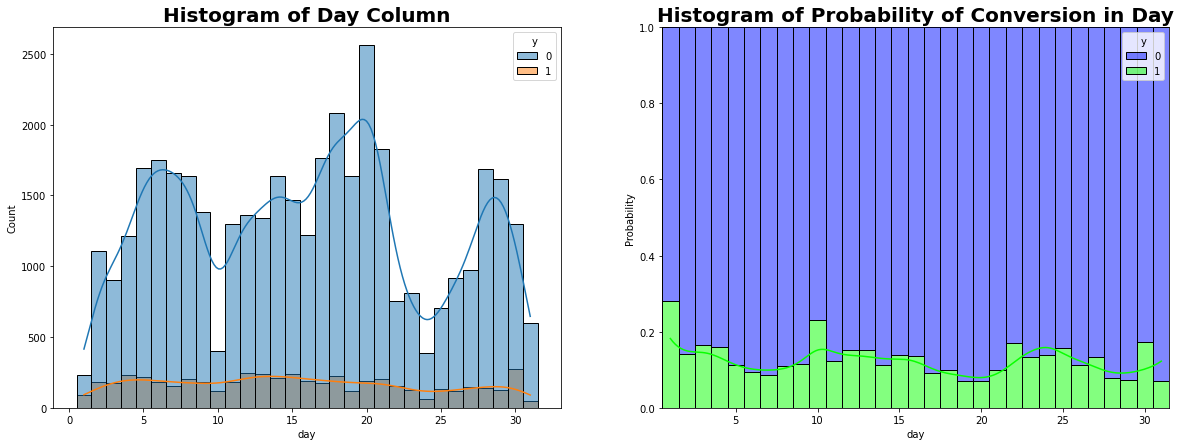

In [373]:
fig,axes=plt.subplots(1,2,figsize=(20,7))

sns.histplot(data=data,x=data['day'],hue='y', binwidth=1,kde=True,ax=axes[0],discrete=True).set_title("Histogram of Day Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['day'],hue='y',palette='hsv_r',binwidth=1 ,kde=True,ax=axes[1],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Day",fontweight='bold',fontsize=20 )

## 8. Duration column

In [374]:
data.dur.isnull().sum()


0

<AxesSubplot:xlabel='dur'>

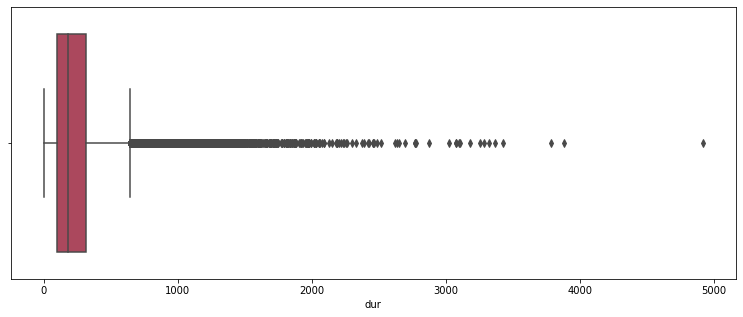

In [375]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='dur',palette='inferno')

In [376]:
i,j,k=outlier('dur')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(i,j,k))

U.Threshold:  643.0 
L.Threshold:  -221.0
Outlier detected!:  1666
Outlier detected!:  1492
Outlier detected!:  787
Outlier detected!:  1778
Outlier detected!:  812
Outlier detected!:  1042
Outlier detected!:  1467
Outlier detected!:  1389
Outlier detected!:  849
Outlier detected!:  677
Outlier detected!:  2033
Outlier detected!:  673
Outlier detected!:  1056
Outlier detected!:  717
Outlier detected!:  683
Outlier detected!:  1077
Outlier detected!:  1419
Outlier detected!:  730
Outlier detected!:  746
Outlier detected!:  702
Outlier detected!:  714
Outlier detected!:  962
Outlier detected!:  742
Outlier detected!:  669
Outlier detected!:  680
Outlier detected!:  808
Outlier detected!:  652
Outlier detected!:  1201
Outlier detected!:  1030
Outlier detected!:  769
Outlier detected!:  673
Outlier detected!:  744
Outlier detected!:  765
Outlier detected!:  1623
Outlier detected!:  678
Outlier detected!:  699
Outlier detected!:  1677
Outlier detected!:  918
Outlier detected!:  1297
Outlier

There are 3235 outliers in ***'duration'*** column!

*  Upper threshold = 643 seconds
*  Lower threshold = -221 seconds


In [377]:
duration_outliers_converted=data.query('dur>643 and y==1')
duration_outliers_converted

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
83,59.0,admin.,married,secondary,unknown,5,may,1042,1,unknown,1
86,56.0,admin.,married,secondary,unknown,5,may,1467,1,unknown,1
87,41.0,technician,married,secondary,unknown,5,may,1389,1,unknown,1
168,54.0,admin.,married,tertiary,unknown,5,may,673,2,unknown,1
388,56.0,management,married,tertiary,unknown,6,may,1201,1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
45085,25.0,technician,single,secondary,cellular,22,oct,716,3,unknown,1
45124,27.0,blue-collar,single,primary,cellular,26,oct,701,2,unknown,1
45200,38.0,technician,married,secondary,cellular,16,nov,1556,4,unknown,1
45206,51.0,technician,married,tertiary,cellular,17,nov,977,3,unknown,1


In [378]:
conversion_rate_in_dur_outliers=(duration_outliers_converted.shape[0]/3235)*100
conversion_rate_in_dur_outliers

51.035548686244205

✍ Outliers in duration column have more conversion rate of 51% !!, where as total conversion rate of the entire dataset is only 11.7%.

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Duration')

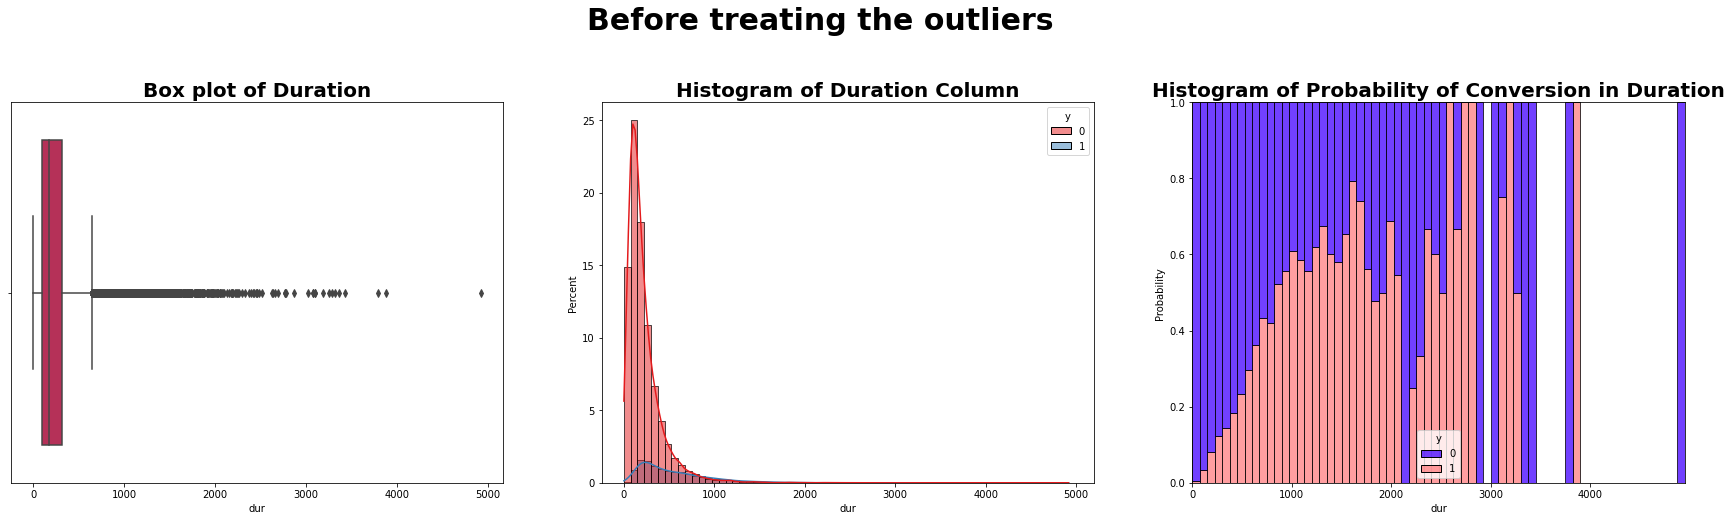

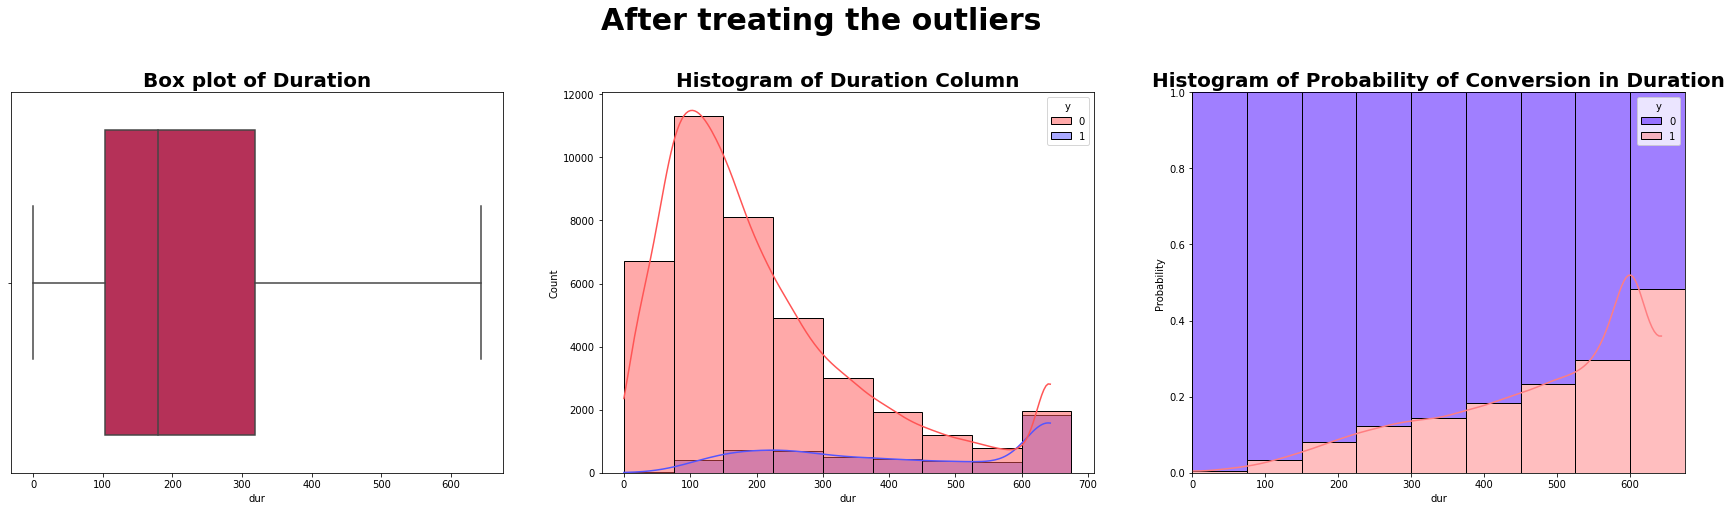

In [379]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating the outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='dur',palette='rocket',ax=axes[0]).set_title("Box plot of Duration",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='Set1',binwidth=75,kde=True,ax=axes[1],stat='percent').set_title("Histogram of Duration Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='gnuplot2',binwidth=75,kde=False,ax=axes[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Duration",fontweight='bold',fontsize=20 )

data['dur'] = data['dur'].clip(-221,643) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(30,7))
plt.suptitle("After treating the outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='dur',palette='rocket',ax=axes2[0]).set_title("Box plot of Duration",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='seismic_r',binwidth=75,kde=True,ax=axes2[1]).set_title("Histogram of Duration Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['dur'],hue='y',palette='gnuplot2',binwidth=75,kde=True,ax=axes2[2],multiple='fill',stat='probability').set_title("Histogram of Probability of Conversion in Duration",fontweight='bold',fontsize=20 )



From the plots it is evident that as the duration increases conversion rate is increasing. 

## 9. Number of Calls column

In [380]:
data.num_calls.isnull().sum()

0

<AxesSubplot:xlabel='num_calls'>

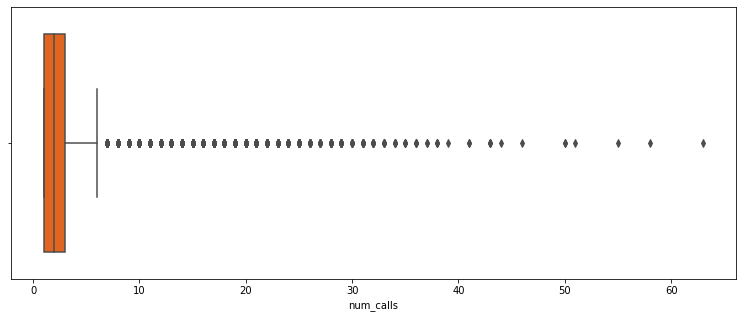

In [381]:
plt.figure(figsize=(13,5))
sns.boxplot(data=data,x='num_calls',palette='hot')

In [382]:
l,m,n=outlier('num_calls')
print("UTL: {}, LTL: {}, Total Outliers: {}".format(l,m,n))

U.Threshold:  6.0 
L.Threshold:  -2.0
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  9
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  8
Outlier detected!:  10
Outlier detected!:  11
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  8
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  7
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  12
Outlier detected!:  9
Outlier detected!:  9
Outlier detected!:  8
Outlier detected!:  10
Outlier detected!:  13
Outlier detected!:  11
Outlier de

1. Total number of outliers = 3064
2. Upper threshold = 6
3. Lower threshold = -2
4. Max. value in the column = 63

In [383]:
num_calls_outliers_converted=data.query('num_calls>6 & y==1')
num_calls_outliers_converted

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3331,50.0,entrepreneur,married,primary,unknown,15,may,643,32,unknown,1
5236,35.0,blue-collar,married,primary,unknown,23,may,643,8,unknown,1
5705,44.0,technician,divorced,secondary,unknown,26,may,643,11,unknown,1
5973,30.0,services,married,secondary,unknown,26,may,643,7,unknown,1
7048,51.0,entrepreneur,married,unknown,unknown,28,may,560,9,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
44232,45.0,management,married,tertiary,cellular,19,jul,568,7,unknown,1
44337,25.0,services,single,unknown,cellular,29,jul,276,8,other,1
44583,24.0,student,single,secondary,cellular,19,aug,418,11,success,1
44770,37.0,services,single,tertiary,cellular,13,sep,323,9,other,1


In [384]:
conversion_rate_in_numcalls_outliers=(num_calls_outliers_converted.shape[0]*100/3064)
conversion_rate_in_numcalls_outliers

5.254569190600522

The conversion rate with number of calls is 5.25% only

Text(0.5, 1.0, 'Histogram of Probability of Conversion in Number of Calls')

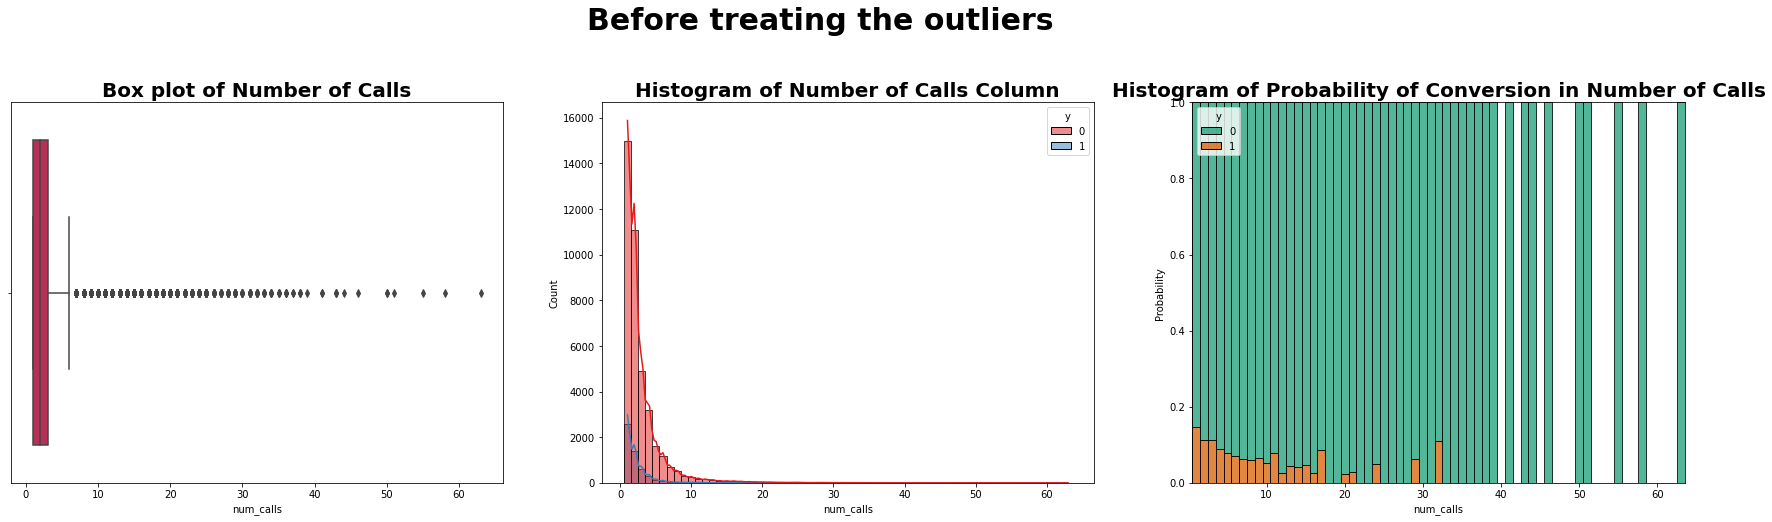

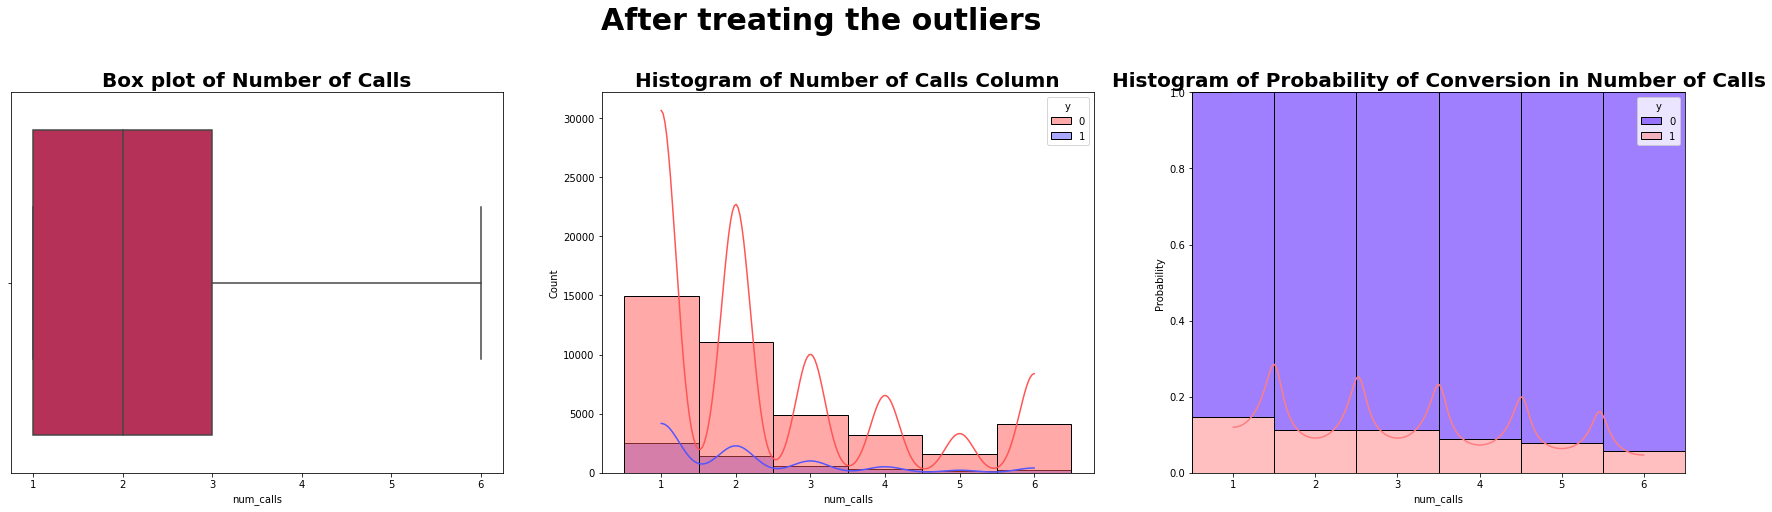

In [385]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

plt.suptitle("Before treating the outliers",y=1.07,fontweight='heavy',fontsize=30)

sns.boxplot(data=data,x='num_calls',palette='rocket',ax=axes[0]).set_title("Box plot of Number of Calls",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='Set1',binwidth=3,kde=True,ax=axes[1],discrete=True).set_title("Histogram of Number of Calls Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='Dark2',binwidth=3,kde=False,ax=axes[2],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Number of Calls",fontweight='bold',fontsize=20 )

data['num_calls'] = data['num_calls'].clip(-2,6) # Clipping the outliers

fig2,axes2=plt.subplots(1,3,figsize=(30,7))
plt.suptitle("After treating the outliers",y=1.05,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='num_calls',palette='rocket',ax=axes2[0]).set_title("Box plot of Number of Calls",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='seismic_r',binwidth=1,kde=True,ax=axes2[1],discrete=True).set_title("Histogram of Number of Calls Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['num_calls'],hue='y',palette='gnuplot2',binwidth=1,kde=True,ax=axes2[2],multiple='fill',stat='probability',discrete=True).set_title("Histogram of Probability of Conversion in Number of Calls",fontweight='bold',fontsize=20)



## **Methods to Plot**

In [386]:
# data = a DataFrame
# cat_cols = list of categorical column names in the DataFrame 'data'
# cont_cols = list of continuous column names in the DataFrame 'data'

from itertools import combinations
from numpy import random

cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
target='y'

def categorical_multi_variate_target(data,target,cat_cols):

  two_cat_combis=list(combinations(cat_cols,2))
  palette=['crest','crest_r','cubehelix','cubehelix_r','flare','afmhot','autumn_r',
           'flare_r','gist_earth','gist_earth_r','gist_heat','gist_heat_r','afmhot_r', 
           'gist_ncar','gist_ncar_r','gist_rainbow','gist_rainbow_r','gist_stern','CMRmap',
           'gist_stern_r','gnuplot','viridis','rocket','magma','mako','flare','autumn','icefire', 
           'gnuplot_r','seismic_r','crest','vlag','cividis','icefire','Spectral',
           'coolwarm','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral_r']

  for x in two_cat_combis:

    num=random.randint(len(palette))
    
    table=data.pivot_table(index=x[0],columns=x[1],values=target)
    table=table.apply(lambda x : x*100)

    plt.figure(figsize=(17,8))
    fig=sns.heatmap(data=table,annot=True,cmap=palette[num],cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)

    title_string="Heatmap showing Rate of Conversion with {} & {} in percentages"
    plt.title(title_string.format(x[0],x[1]),fontsize=20,fontweight='bold',pad=25)
   
    plt.xlabel(x[1],fontsize=15,fontweight='bold',labelpad=5)
    plt.xticks(fontsize=13,rotation=45,ha='right')[1:-1]
    plt.ylabel(x[0],fontsize=15,fontweight='bold',labelpad=20)
    plt.yticks(fontsize=13)

In [387]:
# from itertools import combinations

# cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
# two=list(combinations(cat_cols,2))
# xx=two[0]
# xx[1]
# title_string="Heatmap showing Rate of Conversion with various {} & {} in percentages "
# print(title_string.format(xx[0],xx[1]))

In [388]:
def categorical_Bi_variate_target(data,target,cat_cols):

  colours=['Accent','Accent_r','BrBG','BrBG_r','PRGn','PRGn_r','PiYG','PiYG_r','PuBu','PuBuGn',
           'PuBuGn_r','PuBu_r','PuOr','PuOr_r','RdBu','RdBu_r','RdGy','RdGy_r', 'RdPu','RdPu_r',
           'RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']

  for x in  cat_cols:

    num=random.randint(len(colours))

    table=pd.pivot_table(data=data,values='y',index=x).sort_values(by='y')
    table['y']=table['y']*100 

    fig,axes=plt.subplots(1,2,figsize=(15,7))
    title="Percentage of Conversion in {} "
    plt.suptitle(title.format(x),fontweight='bold',fontsize=20)

    table.plot(kind='barh',ax=axes[0],legend=None,cmap=colours[num])
    table.plot(kind='pie',subplots=True,ax=axes[1],cmap=colours[num])
    plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')



In [389]:
cat_cols=['job','marital','education_qual','call_type','mon','prev_outcome']
target='y'

def categorical_Bi_variate_heatmap(data,target,cat_cols):
  colours=['Accent','Accent_r','BrBG','BrBG_r','PRGn','PRGn_r','PiYG','PiYG_r','PuBu','PuBuGn','rainbow','rocket','viridis','CMRmap',
           'PuBuGn_r','PuBu_r','PuOr','PuOr_r','RdBu','RdBu_r','RdGy','RdGy_r', 'RdPu','RdPu_r','magma','mako','flare','icefire',
           'RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']

  for x in cat_cols:

    num=random.randint(len(colours))

    table=pd.pivot_table(data=data,values='y',index=x)
    table['y']=table['y']*100 

    plt.figure(figsize=(15,7))
    sns.heatmap(data=table,annot=True,cmap=colours[num],cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(15)
    plt.title("Heatmap showing Rate of Conversion in {} in Percentages".format(x),fontsize=20,fontweight='bold',pad=25)
    plt.xlabel("Percentage",fontsize=12,fontweight='bold',color='green')
    plt.ylabel(x,fontsize=12,labelpad=20,fontweight='bold',color='green')
    plt.xticks([])


In [390]:
def categorical_uni_variation(data,target,cat_cols):

  palette=['crest','crest_r','cubehelix','cubehelix_r','flare','afmhot','autumn_r',
           'flare_r','gist_earth','gist_earth_r','gist_heat','gist_heat_r','afmhot_r', 
           'gist_ncar','gist_ncar_r','gist_rainbow','gist_rainbow_r','gist_stern','CMRmap',
           'gist_stern_r','gnuplot','viridis','rocket','magma','mako','flare','autumn','icefire', 
           'gnuplot_r','seismic_r','crest','vlag','cividis','icefire','Spectral',
           'coolwarm','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral_r']         

  for x in cat_cols:

    num=random.randint(len(palette))

    plt.figure(figsize=(13,6))
    sns.countplot(data=data,x=x,hue=target,palette=palette[num])
    plt.xlabel(x,fontsize=12,labelpad=20,fontweight='bold')

In [391]:
from itertools import combinations

cont_cols=['age','dur','day','num_calls']

two_cont_combis=list(combinations(cont_cols,2))
two_cont_combis

[('age', 'dur'),
 ('age', 'day'),
 ('age', 'num_calls'),
 ('dur', 'day'),
 ('dur', 'num_calls'),
 ('day', 'num_calls')]

## Uni-Variate Analysis in Categorical Coulmns

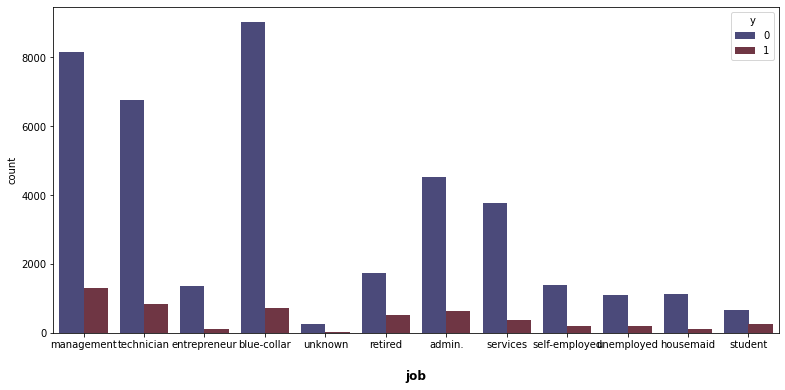

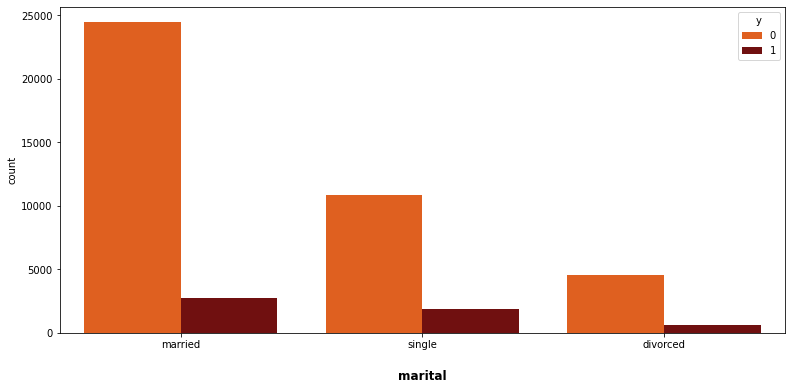

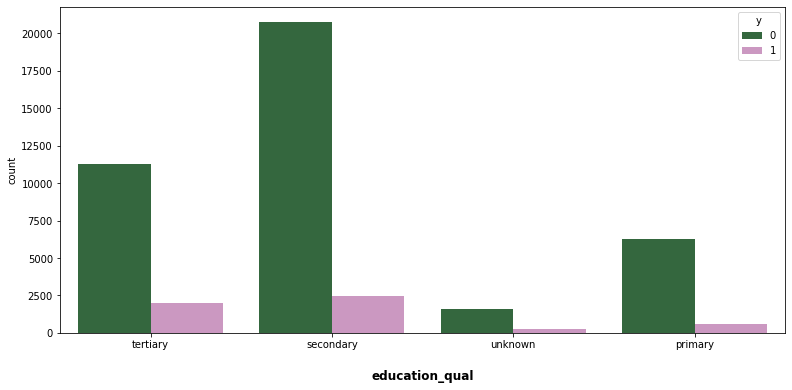

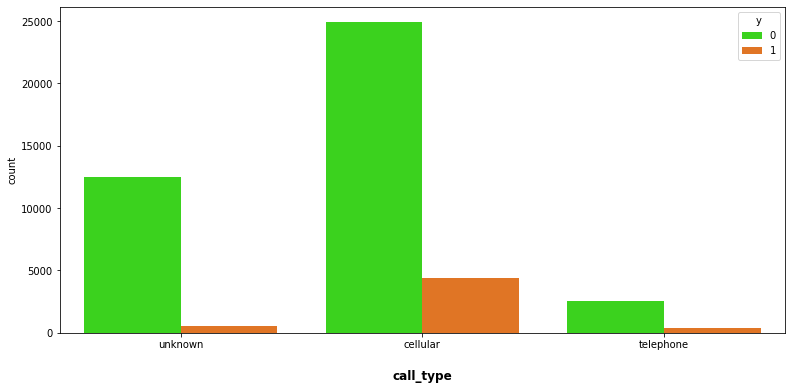

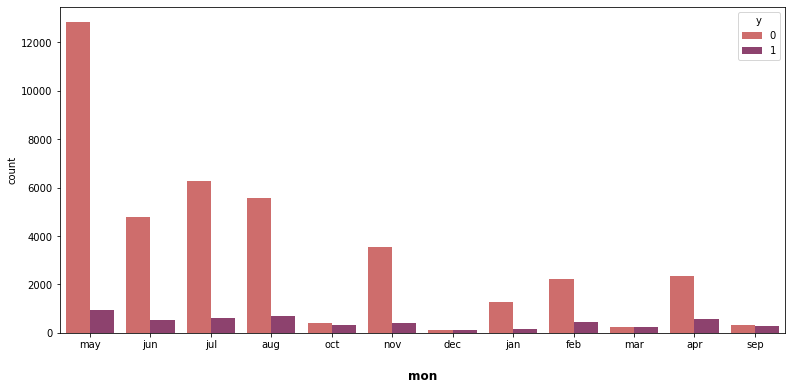

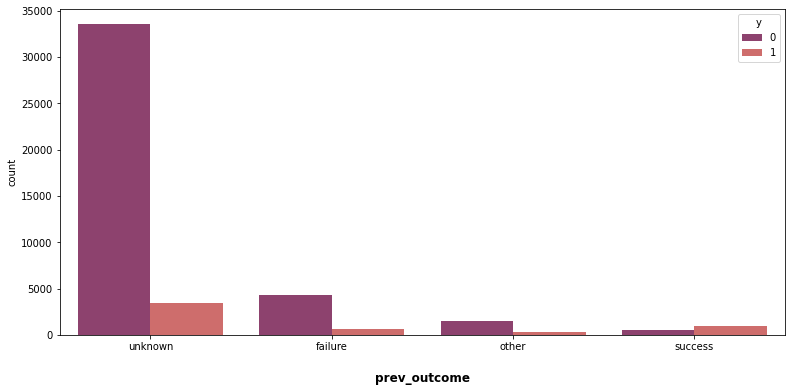

In [392]:
categorical_uni_variation(data,target,cat_cols)


## Bi-Variate Analysis in Categorical Columns

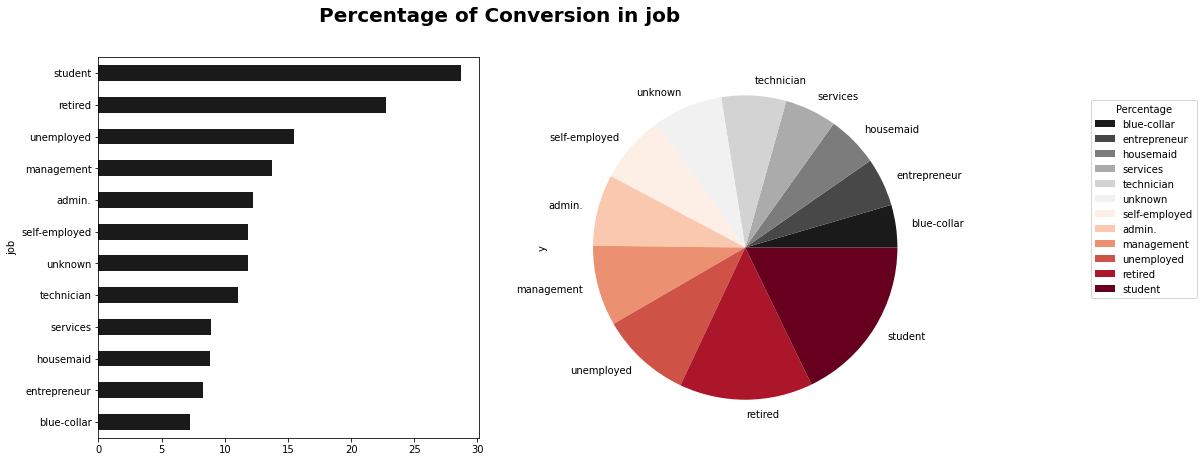

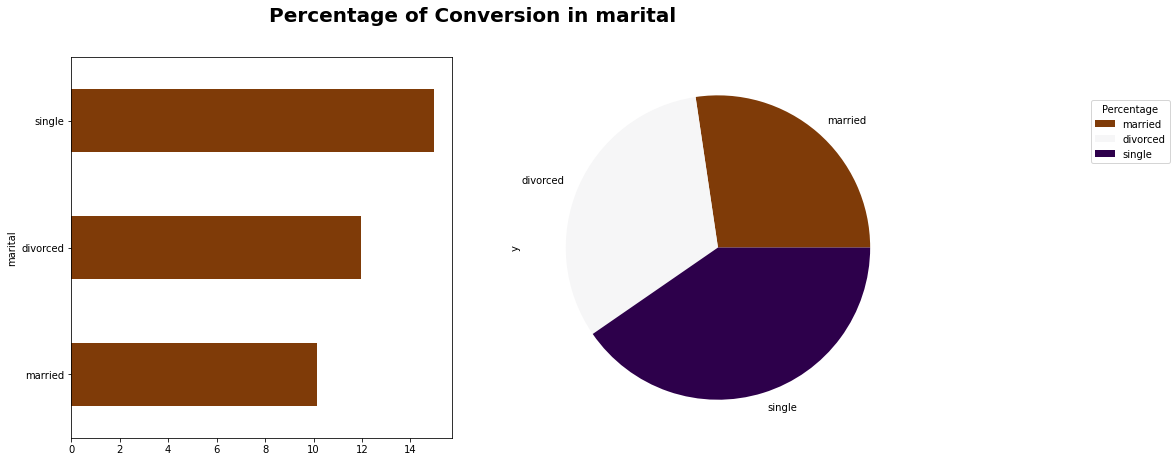

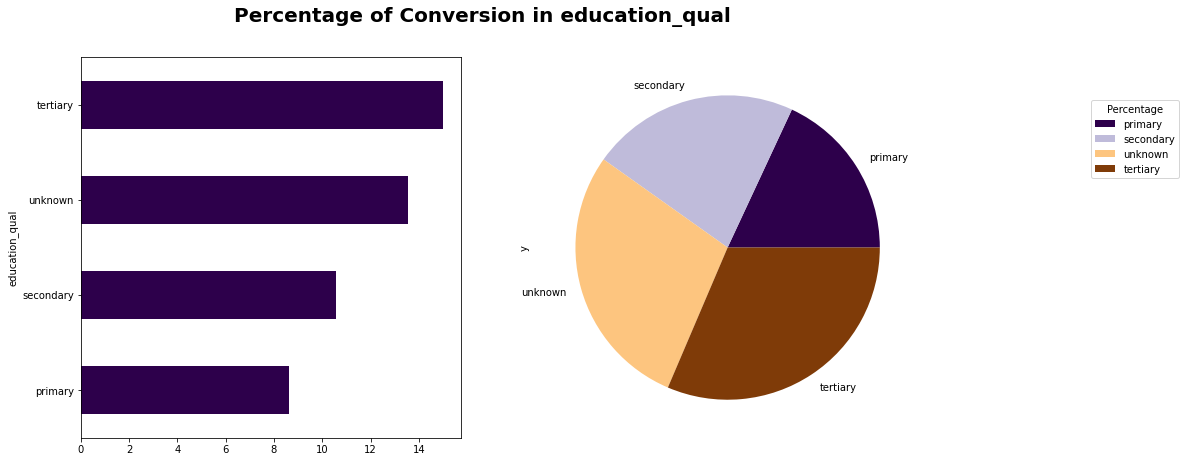

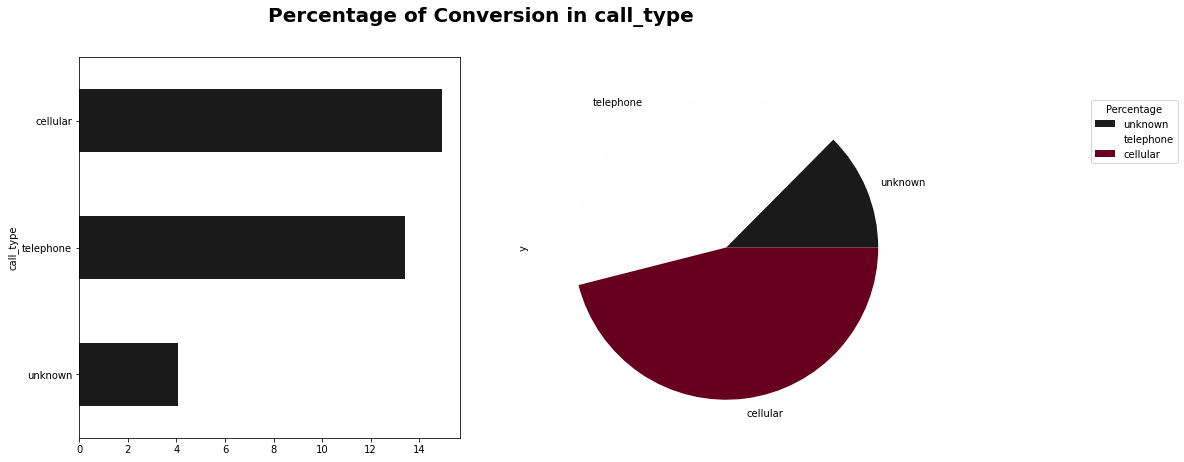

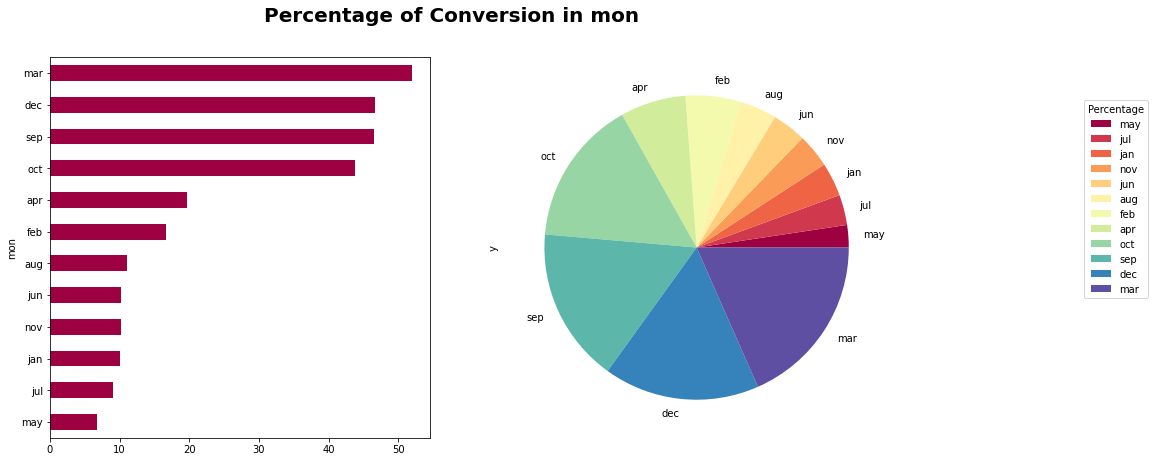

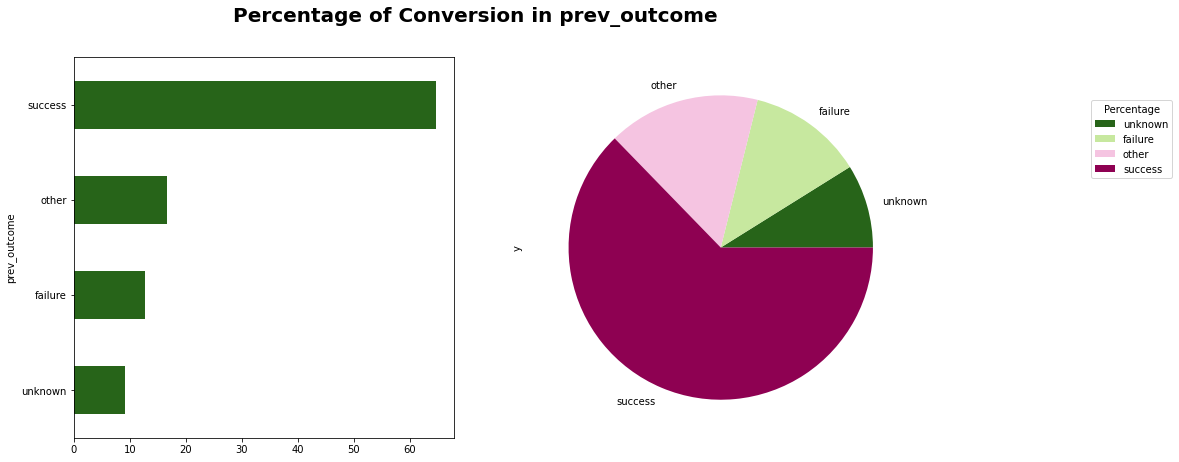

In [393]:
categorical_Bi_variate_target(data,target,cat_cols)


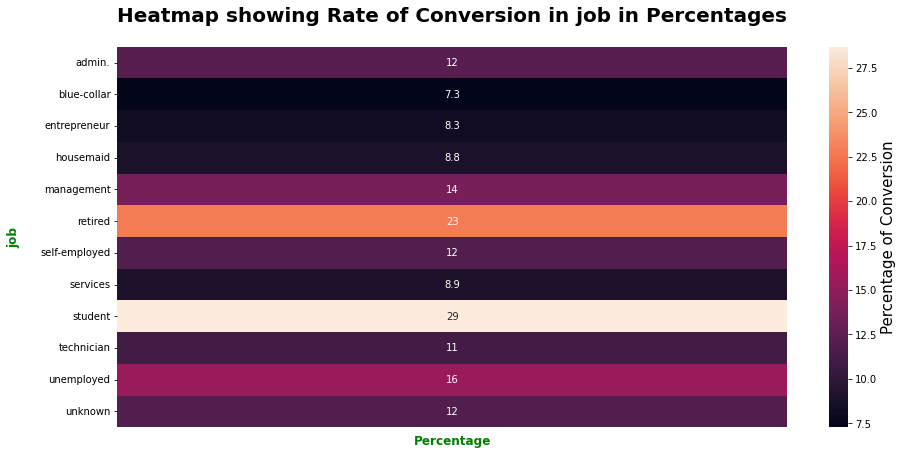

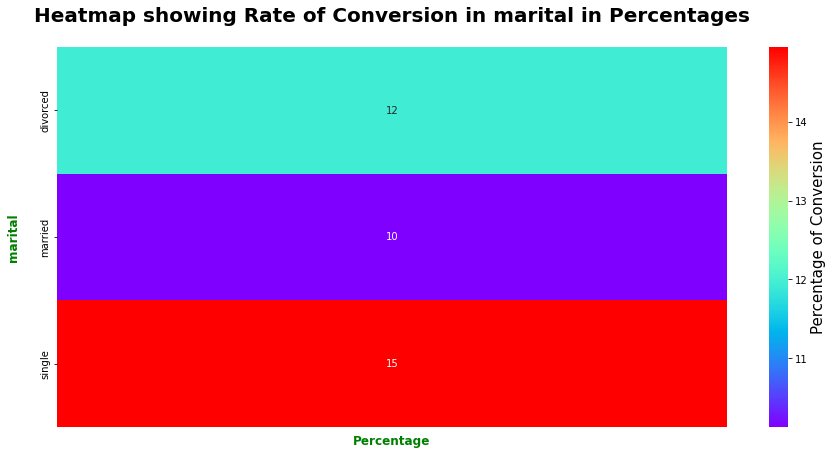

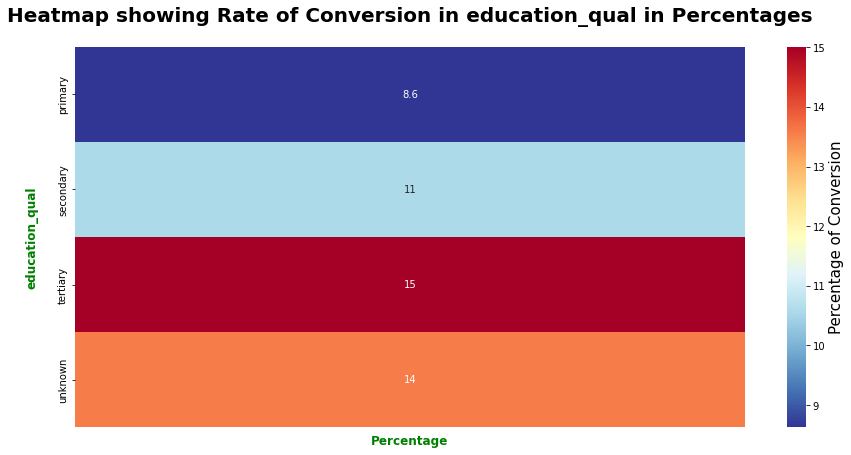

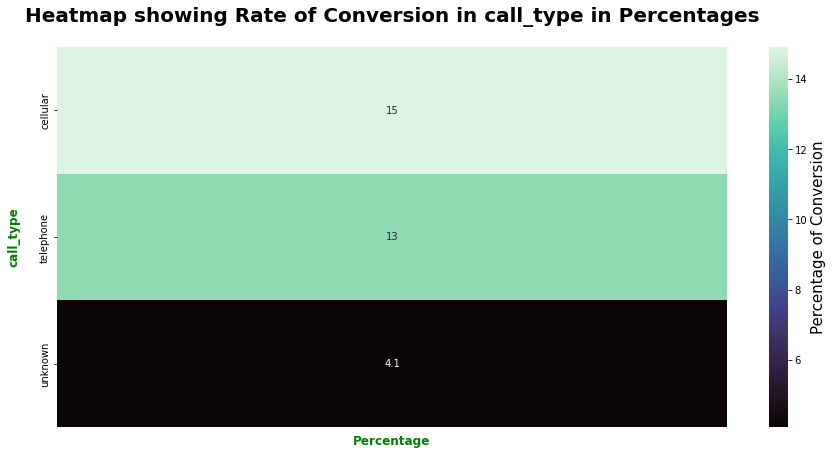

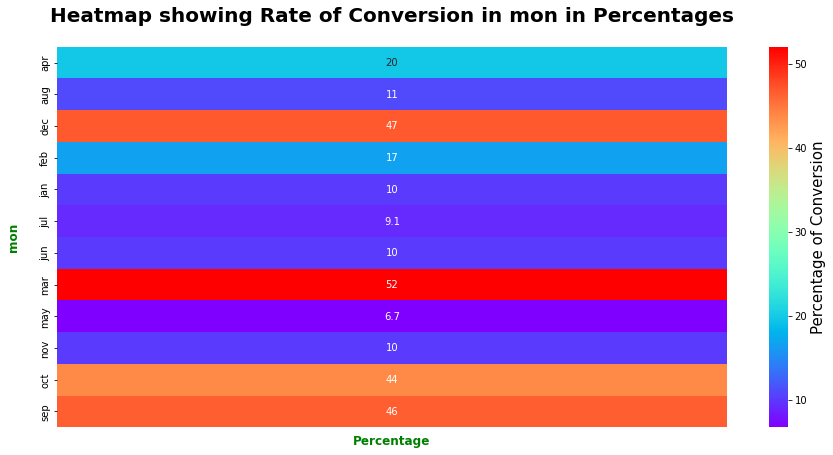

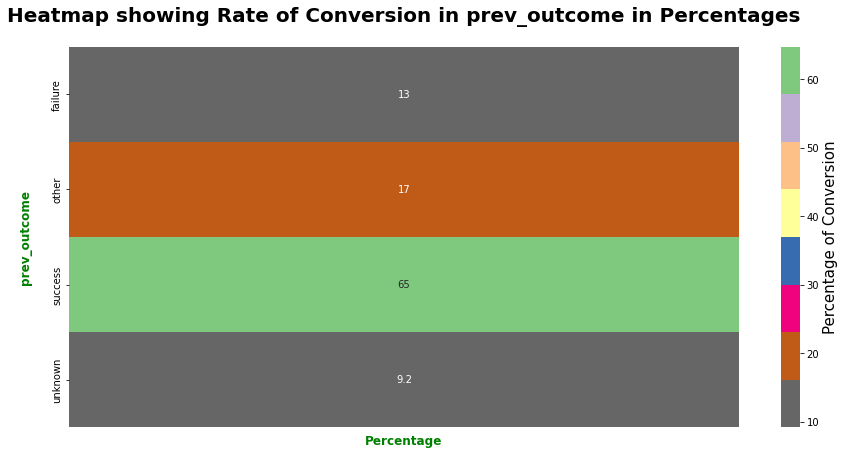

In [394]:
categorical_Bi_variate_heatmap(data,target,cat_cols)


## Multi-Variate Analysis in Categorical Columns

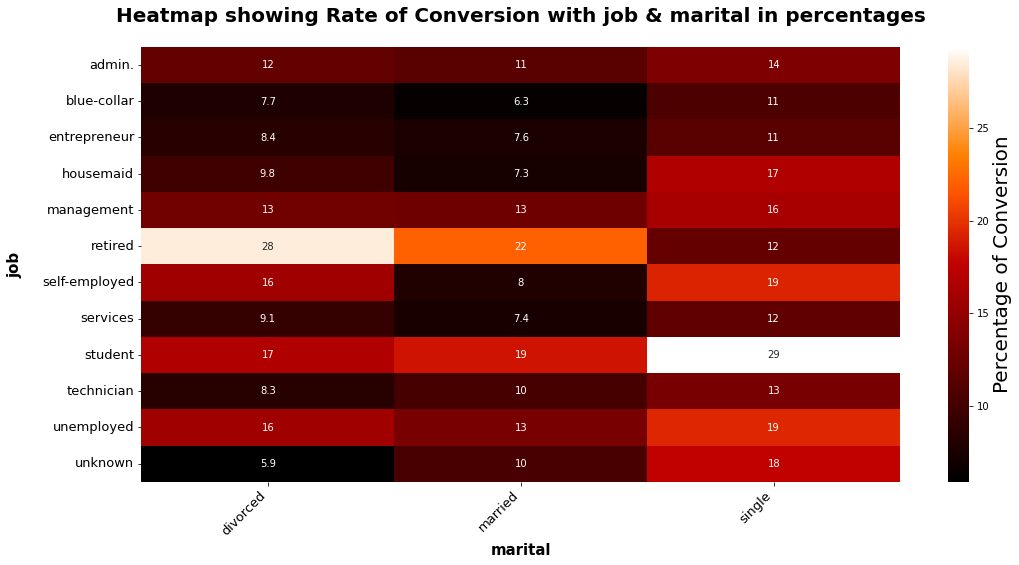

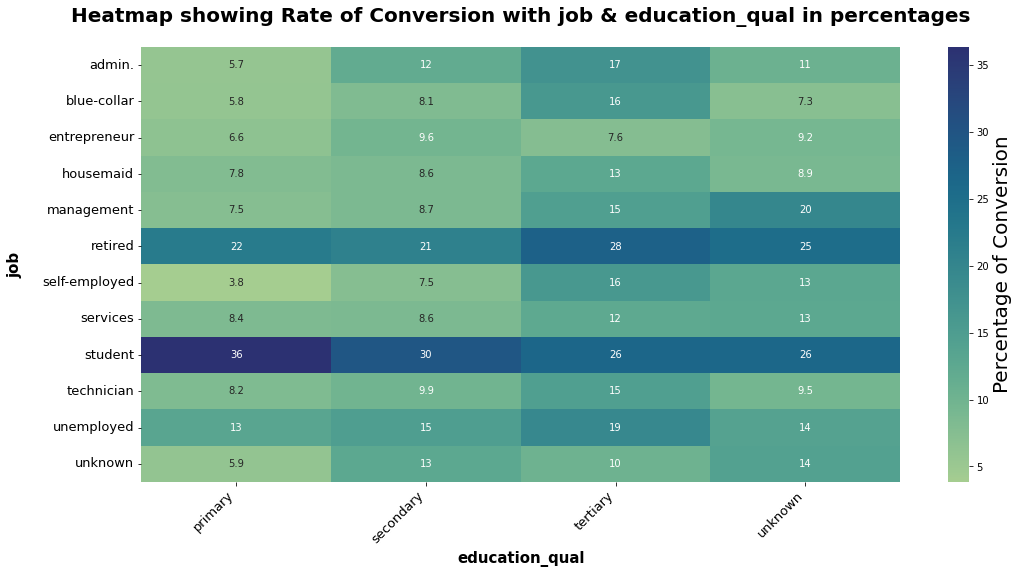

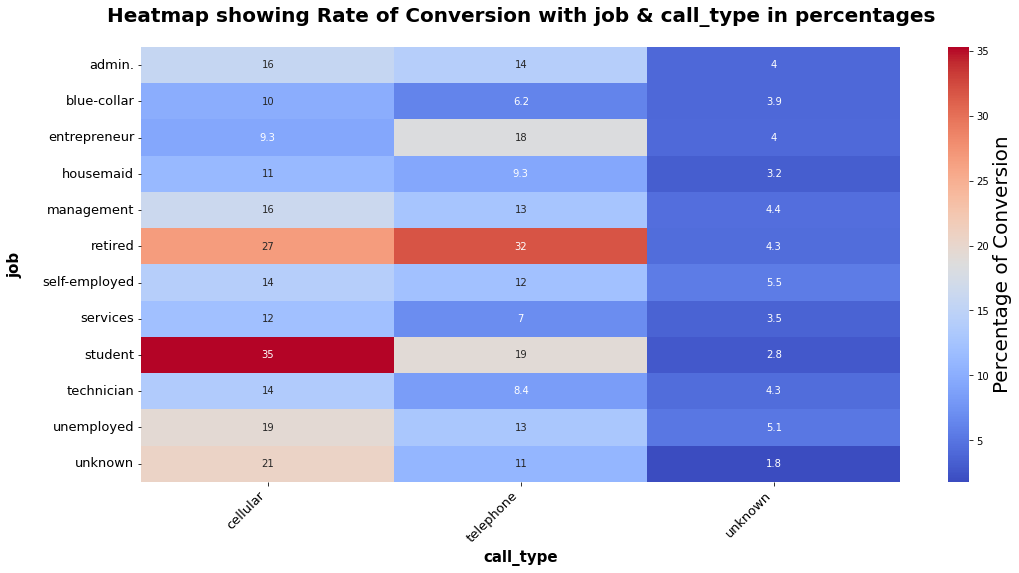

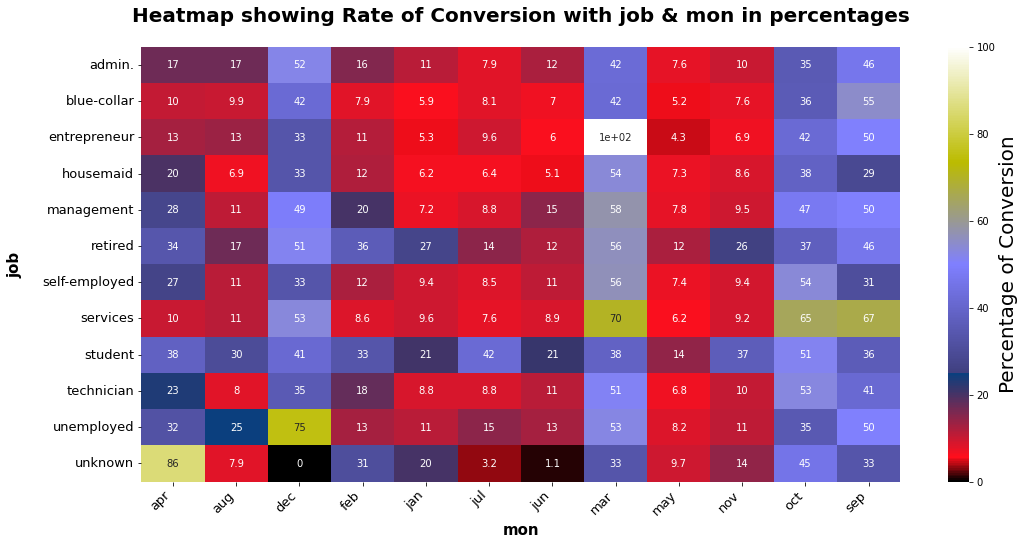

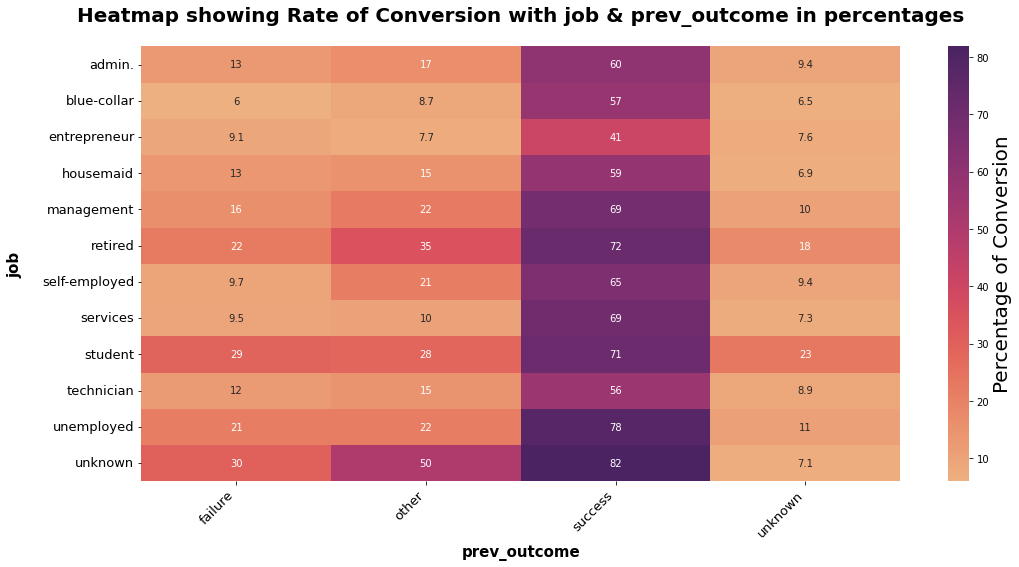

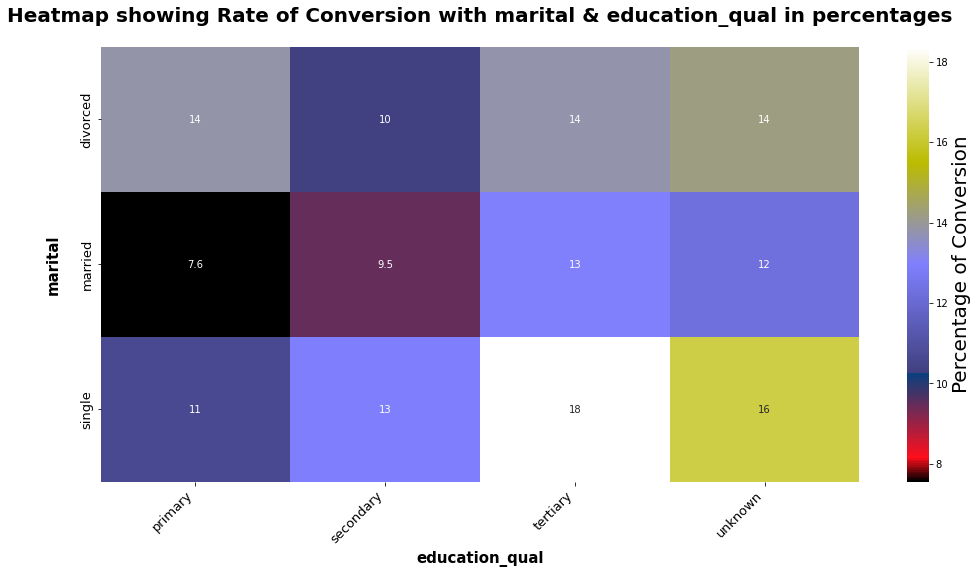

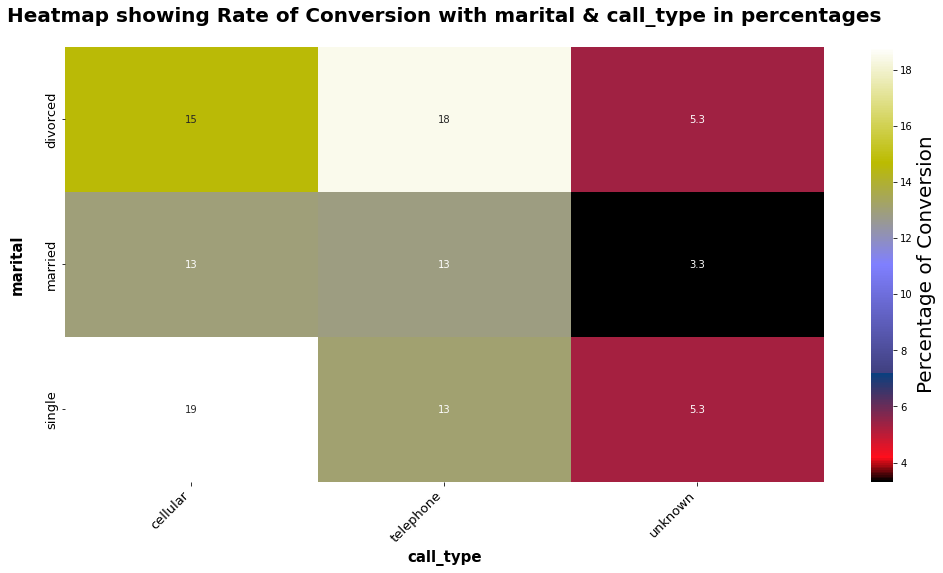

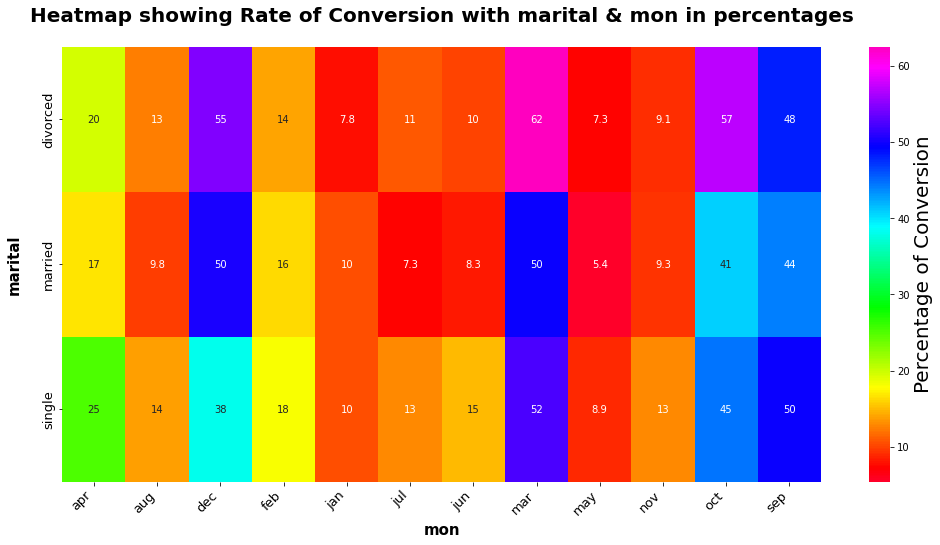

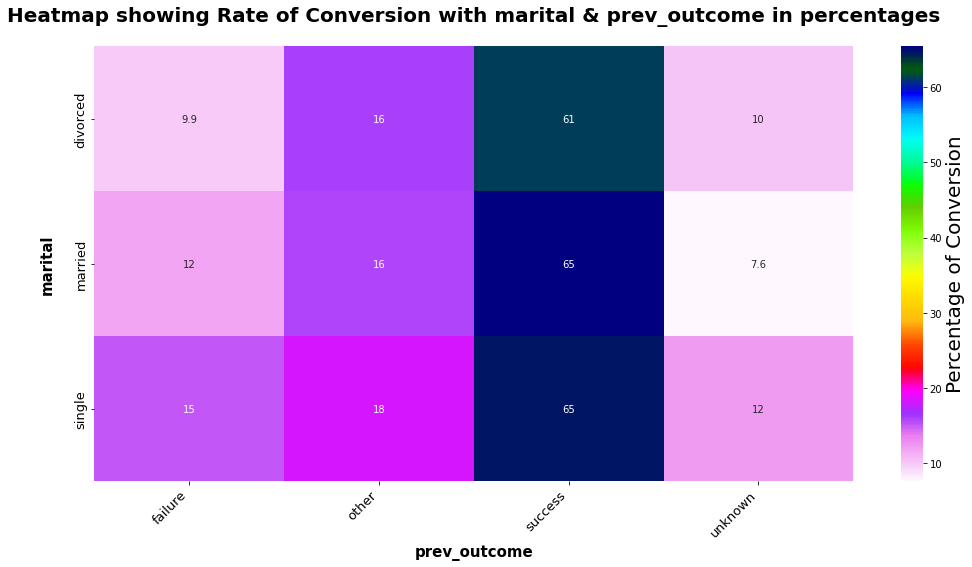

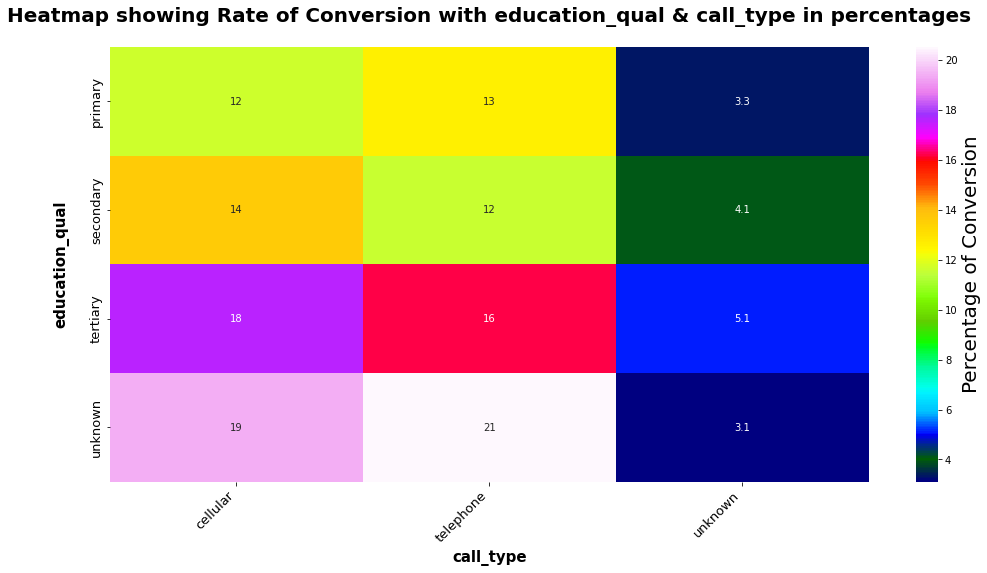

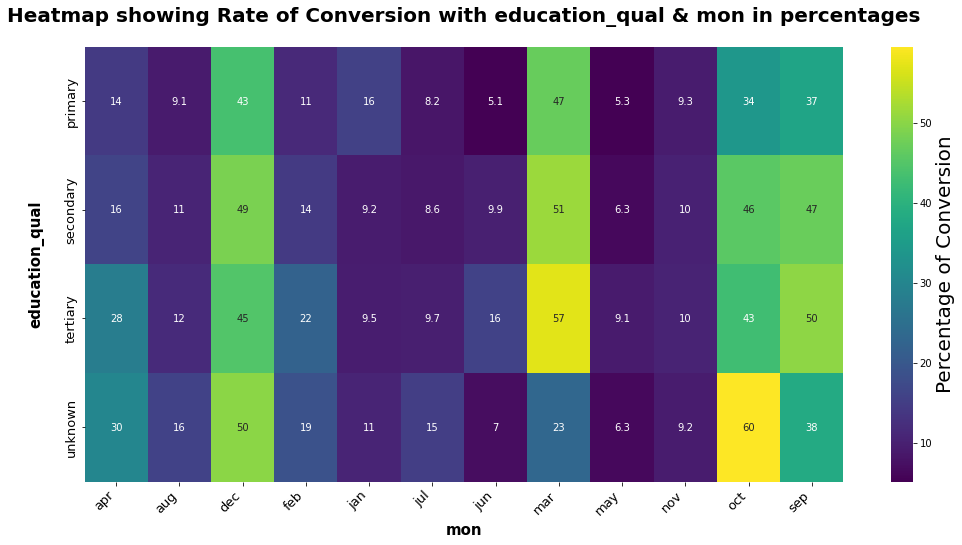

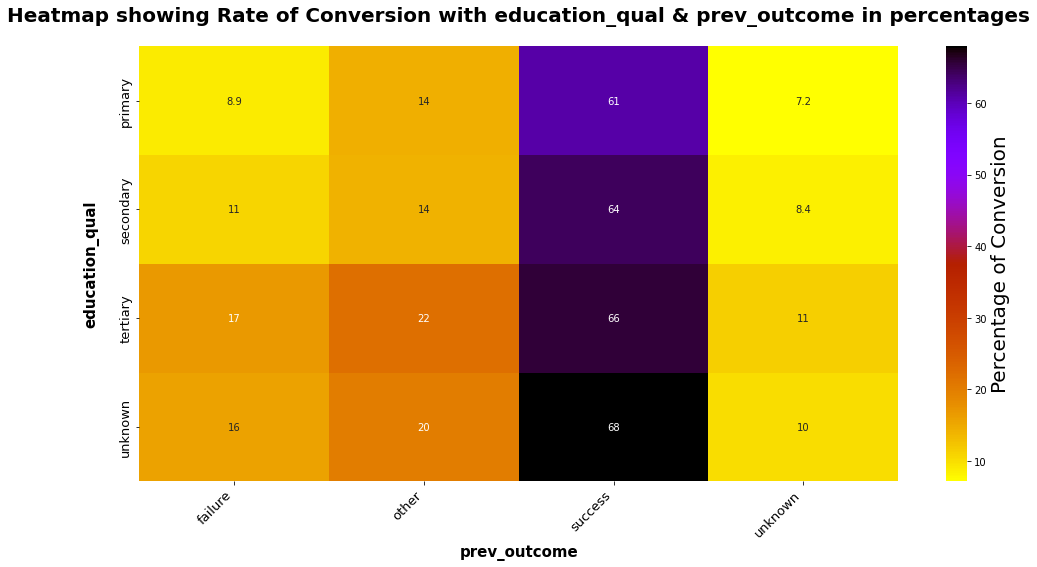

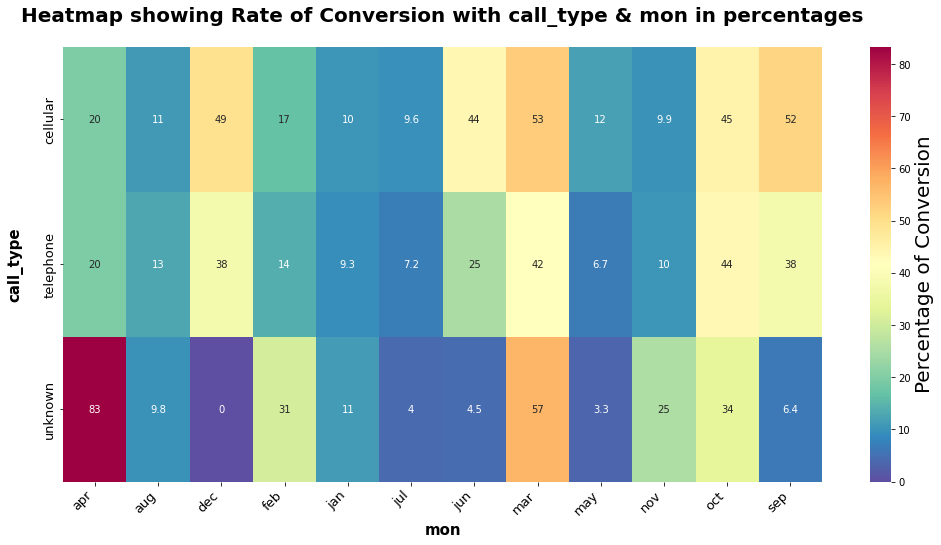

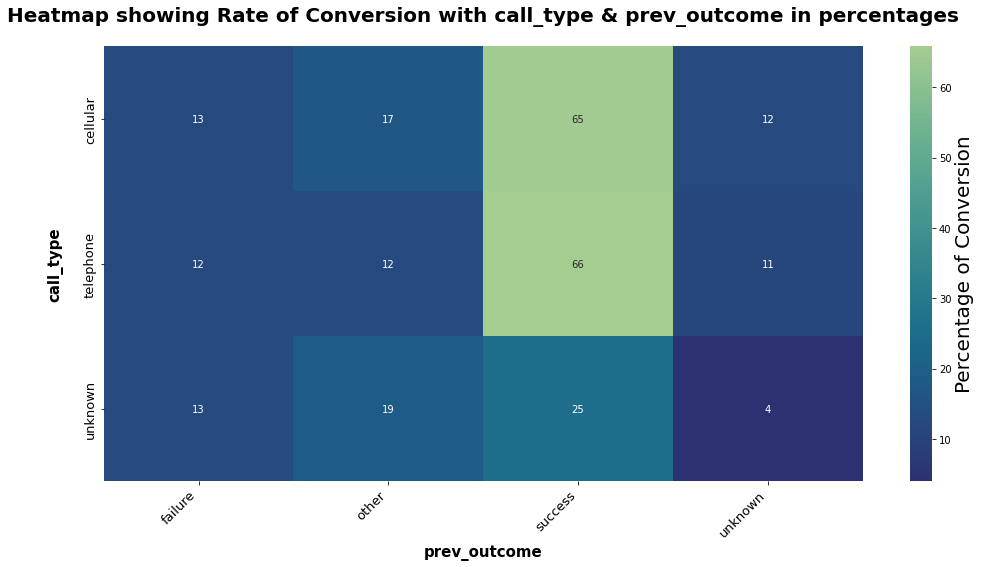

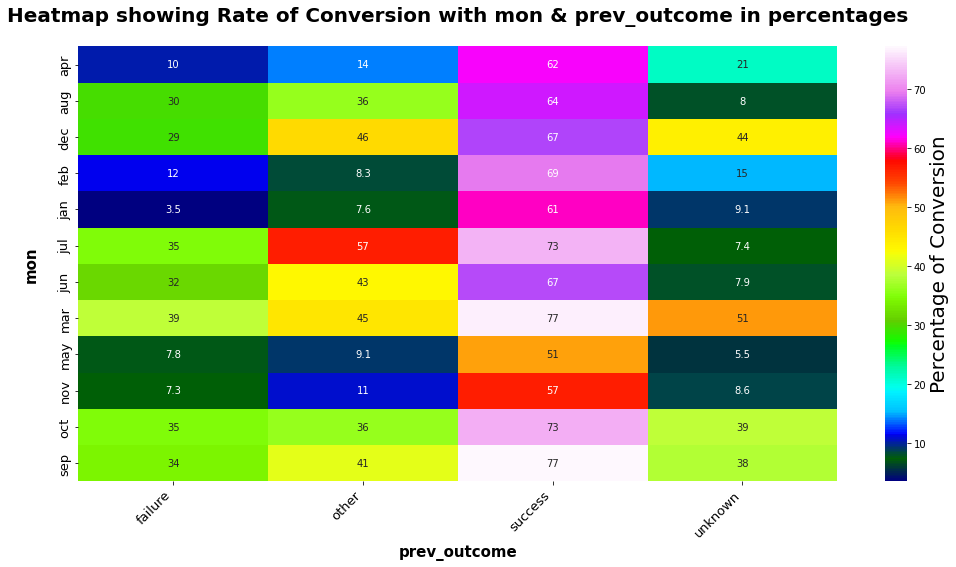

In [395]:
categorical_multi_variate_target(data,target,cat_cols)


## Multi-Variate analysis in Continuous coulumns

In [396]:
# data = a DataFrame
# cat_cols = list of categorical column names in the DataFrame 'data'
# cont_cols = list of continuous column names in the DataFrame 'data'

from itertools import combinations
from numpy import random

cat_cols=['y','job','marital','education_qual','call_type','mon','prev_outcome']
cont_cols=['age','dur','day','num_calls']
two_cont_combis=list(combinations(cont_cols,2))

palette=['crest','crest_r','cubehelix','cubehelix_r','flare','afmhot','autumn_r',
           'flare_r','gist_earth','gist_earth_r','gist_heat','gist_heat_r','afmhot_r', 
           'gist_ncar','gist_ncar_r','gist_rainbow','gist_rainbow_r','gist_stern','CMRmap',
           'gist_stern_r','gnuplot','viridis','rocket','magma','mako','flare','autumn','icefire', 
           'gnuplot_r','seismic_r','crest','vlag','cividis','icefire','Spectral',
           'coolwarm','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral_r']

for category in cat_cols:
  for combo in two_cont_combis:
    num=np.random.randint(len(palette))
    figure=sns.jointplot(data=data,x=combo[0],y=combo[1],kind='kde',hue=category,shade=True,height=9,palette=palette[num])

Output hidden; open in https://colab.research.google.com to view.

In [397]:
two_cont_combis=list(combinations(cont_cols,2))
two_cont_combis

[('age', 'dur'),
 ('age', 'day'),
 ('age', 'num_calls'),
 ('dur', 'day'),
 ('dur', 'num_calls'),
 ('day', 'num_calls')]

# **Encoding**



## Job column




In [398]:
data.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [399]:
data['job']=data.job.map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})

## Marital column

In [400]:
# data['marital']=data.marital.map({'married':0,'divorced':1,'single':2})   # Label Encoding

In [401]:
data= pd.get_dummies(data, columns=["marital"])   # One-Hot Encoding
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,marital_divorced,marital_married,marital_single
0,58.0,8,tertiary,unknown,5,may,261,1,unknown,0,0,1,0
1,44.0,4,secondary,unknown,5,may,151,1,unknown,0,0,0,1
2,33.0,1,secondary,unknown,5,may,76,1,unknown,0,0,1,0
3,47.0,0,unknown,unknown,5,may,92,1,unknown,0,0,1,0
4,33.0,5,unknown,unknown,5,may,198,1,unknown,0,0,0,1


## Education Qualification

In [402]:
data['education_qual']=data.education_qual.map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})

## Call type

In [403]:
data['call_type']=data.call_type.map({'unknown':0,'telephone':1,'cellular':2})

## Month column

In [404]:
data['mon']=data.mon.map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

## Previous outcome

In [405]:
# data['prev_outcome']=data.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})   # Label Encoding
# data['prev_outcome']

In [406]:
data= pd.get_dummies(data, columns=['prev_outcome'])        # One-Hot Encoding
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44.0,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33.0,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47.0,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33.0,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


## **Target and Feature Selection**

In [407]:
x= data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = data['y'].values
     

# **Splitting & Balancing**

###**Splitting**

In [408]:
from sklearn.model_selection import train_test_split

# features=['age','education_qual','day','dur','num_calls','job','marital','mon','prev_outcome','call_type']
# target=['y']

# x=data[features]
# y=data[target]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=38,)

In [409]:
x_train.shape

(36164, 15)

In [410]:
y_train.shape

(36164,)

### **Balancing**

---



In [411]:
#@title *Random Undersampling*
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

rus = RandomUnderSampler() 
x_rus, y_rus = rus.fit_resample(x_train, y_train) 

log_reg_1 = LogisticRegression()
log_reg_1.fit(x_rus,y_rus)
log_reg_1.score(x_rus,y_rus)

0.8056015126447649

In [412]:
#@title *Random Oversampling*
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

ros = RandomOverSampler() 
x_ros, y_ros = ros.fit_resample(x_train, y_train) #Fit the model
     
log_reg_2 = LogisticRegression()
log_reg_2.fit(x_ros,y_ros)
log_reg_2.score(x_ros,y_ros)

0.8128894873641688

In [413]:
#@title *SMOTE*
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x_train, y_train)

log_reg_3 = LogisticRegression()
log_reg_3.fit(x_sm,y_sm)
log_reg_3.score(x_sm,y_sm)

0.8255096608524097

In [414]:
#@title *SMOTEENN*

from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

smt=SMOTEENN(sampling_strategy="all")
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)

log_reg_4 = LogisticRegression()
log_reg_4.fit(x_train_smt,y_train_smt)
log_reg_4.score(x_train_smt,y_train_smt)

0.8838308002197399

In [415]:
#@title *SMOTE+Tomek*
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

smt_Tmk=SMOTETomek(sampling_strategy="all", random_state=42)
x_train_smt,y_train_smt=smt_Tmk.fit_resample(x_train,y_train)

log_reg_5 = LogisticRegression()
log_reg_5.fit(x_train_smt,y_train_smt)
log_reg_5.score(x_train_smt,y_train_smt)

0.8306522697223446

In [416]:
y_train_smt

array([0, 0, 0, ..., 1, 1, 1])

In [417]:
x_train_smt.shape

(63532, 15)

In [418]:
y_train_smt.shape

(63532,)

# **Model**

## Logistic Regression

In [419]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train_smt,y_train_smt)

y_pred=log_reg.predict(x_test)

In [420]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [421]:
log_reg.predict_proba(x_test) # Predcting the probabilities of x_test


array([[0.57439794, 0.42560206],
       [0.95742864, 0.04257136],
       [0.76569424, 0.23430576],
       ...,
       [0.9817645 , 0.0182355 ],
       [0.97460125, 0.02539875],
       [0.82679621, 0.17320379]])

In [422]:
log_reg.coef_

array([[-1.19905226e-02,  7.33503516e-02,  1.55338800e-01,
         1.56595524e-01, -9.92587577e-04,  2.76380730e-01,
         8.08895689e-03, -2.18811592e-01, -5.92882978e-02,
        -7.30913826e-01, -5.34123239e-01, -7.46635593e-01,
        -1.00545938e-01,  1.54107384e+00, -2.01821767e+00]])

In [423]:
log_reg.intercept_

array([-1.32475441])

Evaluation Metric

In [424]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix
score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred)
score_AUROC=roc_auc_score(y_test,log_reg.predict_proba(x_test)[:,1])
cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",score_AUROC,"\nConfusion Matrix: ",cm)
# roc_Curve = plot_roc_curve(log_reg,x_test,y_test)


Accuracy: 0.8014600154850127 	F1 Score: 0.48787446504992865 	AUROC Score: 0.8840049282418901 
Confusion Matrix:  [[6391 1592]
 [ 203  855]]


## KNN

Scaling

In [425]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_smt_scaled=scaler.transform(x_train_smt)
x_test_scaled=scaler.transform(x_test)

Model

In [426]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_smt_scaled, y_train_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
     

K value : 1 Cross Value Accuracy : 0.8571230359462811
K value : 2 Cross Value Accuracy : 0.8820373035640449
K value : 3 Cross Value Accuracy : 0.8756770969683476
K value : 4 Cross Value Accuracy : 0.8844154539404631
K value : 5 Cross Value Accuracy : 0.8821479153872691
K value : 6 Cross Value Accuracy : 0.885383114337164
K value : 7 Cross Value Accuracy : 0.8851895455579722
K value : 8 Cross Value Accuracy : 0.8854937414519929
K value : 9 Cross Value Accuracy : 0.8844983344384065
K value : 10 Cross Value Accuracy : 0.8856597700509639
K value : 20 Cross Value Accuracy : 0.8879825265890424
K value : 30 Cross Value Accuracy : 0.8875400869419481
K value : 40 Cross Value Accuracy : 0.8863509505873199
K value : 50 Cross Value Accuracy : 0.8864339075432873


In [427]:
# Training the model on the best value of k
knn= KNeighborsClassifier(20)
knn.fit(x_train_smt_scaled, y_train_smt)
print(knn.score(x_train_smt_scaled,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test_scaled)[:, 1]))

0.9034030095070201
AUROC on the sampled dataset :  0.8843155481390392


In [428]:
#@title Scrap
# from imblearn.pipeline import Pipeline as imbpipeline
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.preprocessing import MinMaxScaler
# from imblearn.over_sampling import SMOTE

#                         #        ['classifier', KNeighborsClassifier()]])

# stratified_kfold = StratifiedKFold(n_splits=3,
#                                        shuffle=True,
#                                        random_state=11)
    
# # param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# k_range = list(range(1, 10))
# param_grid = dict(n_neighbors=k_range)

# grid_search = GridSearchCV(KNeighborsClassifier(),
#                            param_grid=param_grid,
#                            scoring='roc_auc',
#                            cv=10,
#                            n_jobs=-1)

# grid_search.fit(x_train_smt, y_train_smt.values.ravel())
# cv_score = grid_search.best_score_
# test_score = grid_search.score(x_test, y_test.values.ravel())
# print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

In [429]:
#@title Scrap
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold
# from sklearn.preprocessing import MinMaxScaler

# from imblearn.pipeline import Pipeline as imbpipeline
# import numpy as np

# y_train_smt_array = y_train_smt.values.ravel() # to convert into a 1d array

# # Finding the best values of K (Hyper Parametre Tuning)
# Training_Score=[]
# Cross_Val_Score=[]
# K=[]

# for i in [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70]:

#   knn = KNeighborsClassifier(i)

#   pipeline = imbpipeline(steps = [['smt', SMOTEENN(random_state=11)],
#                                   ['scaler', StandardScaler()],
#                                   ['classifier', KNeighborsClassifier()]])
  
#   stratified_kfold = StratifiedKFold(n_splits=3,
#                                        shuffle=True,
#                                        random_state=11)
  
#   # param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#   k_range = list(range(1, 10))
#   param_grid = dict(n_neighbors=k_range)
#   grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
#                            param_grid=param_grid,
#                            scoring='roc_auc',
#                            cv=stratified_kfold,
#                            n_jobs=-1)
  
#   grid_search.fit(x_train, y_train)
#   cv_score = grid_search.best_score_

#   test_score = grid_search.score(x_test, y_test)

#   print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

In [430]:
#@title Scrap
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score
# import numpy as np

# y_train_smt_array = y_train_smt.values.ravel() # to convert into a 1d array

# from sklearn.pipeline import Pipeline



# # Finding the best values of K (Hyper Parametre Tuning)
# Training_Score=[]
# Cross_Val_Score=[]
# K=[]

# for i in [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,75,80]:

#   knn=Pipeline([("scale",StandardScaler()),("knn",KNeighborsClassifier(i))])

#   knn.fit(x_train_smt_scaled,y_train_smt_array)

#   Train_score = knn.score(x_train_smt_scaled,y_train_smt_array)
#   CV_score = np.mean(cross_val_score(knn,x_train,y_train.values.ravel(),cv=10,scoring="roc_auc"))

#   K.append(i)
#   Training_Score.append(Train_score)
#   Cross_Val_Score.append(CV_score)

#   print("k-value:",i,"\tTrain Score:",Train_score,"\tCV score:",CV_score)

In [431]:
#@title Scrap
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score
# import numpy as np

# y_train_smt_array = y_train_smt.ravel() # to convert into a 1d array

# # Finding the best values of K (Hyper Parametre Tuning)
# Training_Score=[]
# Cross_Val_Score=[]
# K=[]
# for i in [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,75,80]:
#   knn = KNeighborsClassifier(i)
#   knn.fit(x_train_smt_scaled,y_train_smt_array)

#   Train_score = knn.score(x_train_smt_scaled,y_train_smt_array)
#   CV_score = np.mean(cross_val_score(knn,x_train,y_train.ravel(),cv=10,scoring="roc_auc"))

#   K.append(i)
#   Training_Score.append(Train_score)
#   Cross_Val_Score.append(CV_score)

#   print("k-value:",i,"\tTrain Score:",Train_score,"\tCV score:",CV_score)

In [432]:
#@title Scrap
# k=pd.Series(K)
# accuracy=pd.Series(Training_Score)
# auroc=pd.Series(Cross_Val_Score)
# dictionary={"K-value":k,"Accuracy":accuracy,"AUROC":auroc}
# hyper_param_Tuning=pd.DataFrame(dictionary)
# hyper_param_Tuning

In [433]:
# hyper_param_Tuning['AUROC'].max()

In [434]:
# hyper_param_Tuning.query('AUROC==0.9044291644943578')

Training the model on the best value of 'k'

In [435]:
#@title Scrap
# # Training the model on the best value of 'k'

# knn=KNeighborsClassifier(75)
# knn.fit(x_train_smt_scaled,y_train_smt_array)

# y_predicted=knn.predict(x_test_scaled)
# y_predicted


In [436]:
#@title Scrap
# from sklearn.metrics import accuracy_score,confusion_matrix, f1_score,roc_auc_score

# score_Acc_knn = accuracy_score(y_test,y_predicted)
# score_F1_knn = f1_score(y_test,y_predicted)
# score_AUROC_knn=roc_auc_score(y_test,y_predicted)
# cm_knn = confusion_matrix(y_test,y_predicted)

# # roc_Curve = plot_roc_curve(knn,x_test,y_test)

# print("Accuracy:",score_Acc_knn,"\tF1 Score:",score_F1_knn,"\tAUROC Score:",score_AUROC_knn,"\nConfusion Matrix: ",cm_knn)


In [437]:
#@title Scrap
# # Checking for Underfitting and Overfitting

# from sklearn.model_selection import cross_val_score

# x_train_smt_scaled,y_train_smt_array

# x = x_train_smt_scaled
# y = y_train_smt_array

# for k in [1,2,3,4,5,6,7,8,9,10,13,20,40,70,75,80]:
#   clf = KNeighborsClassifier(n_neighbors=k)
#   clf.fit(x,y)
#   print("K value : ", k, " train score : ", clf.score(x,y) , " test score : ", cross_val_score(clf,x,y,cv = 5, scoring = 'accuracy').mean())

## Decision Tree

In [438]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train_smt,y_train_smt)
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [439]:
score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred)
score_AUROC=roc_auc_score(y_test,y_pred)
# cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",score_AUROC,)
# roc_Curve = plot_roc_curve(dt,x_test,y_test)

Accuracy: 0.8652803893374627 	F1 Score: 0.4577025823686554 	AUROC Score: 0.7006964468683097


In [440]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print(dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

0.9999212995026129
AUROC on the sampled dataset :  0.6939149047112638


In [441]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7236195932758295  Cross val score :  0.8829775583044052
Depth  :  2  Training Accuracy :  0.8057199521500976  Cross val score :  0.8900556153131569
Depth  :  3  Training Accuracy :  0.8165963608890008  Cross val score :  0.8928208575759058
Depth  :  4  Training Accuracy :  0.8279607127117043  Cross val score :  0.8959175915513617
Depth  :  5  Training Accuracy :  0.8644777434993389  Cross val score :  0.8943702635310224
Depth  :  6  Training Accuracy :  0.8675155826984826  Cross val score :  0.8943700190681074
Depth  :  7  Training Accuracy :  0.8840584272492602  Cross val score :  0.8913836600987629
Depth  :  8  Training Accuracy :  0.8937385884278789  Cross val score :  0.8887291595364983
Depth  :  9  Training Accuracy :  0.9053862620411761  Cross val score :  0.8858525644159781
Depth  :  10  Training Accuracy :  0.9180255619215514  Cross val score :  0.8860740478169461
Depth  :  20  Training Accuracy :  0.992366051753447  Cross val score :  0.8621

In [442]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(x_train_smt,y_train_smt) 
print("Accuracy: ",dt.score(x_train_smt,y_train_smt)) 
print( "AUROC : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Accuracy:  0.8279607127117043
AUROC :  0.8543321145335538


## Random Forest

In [443]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=100,criterion="entropy") 
rf.fit(x_train_smt, y_train_smt) 
y_pred = rf.predict(x_test)
y_pred
     

array([0, 0, 0, ..., 0, 0, 0])

In [444]:
F1_Score_rfc=f1_score(y_test,y_pred)
accuracy_rfc=accuracy_score(y_test,y_pred)

print("accuracy score: ",accuracy_rfc)
print("F1 score: ",F1_Score_rfc)
print( "AUROC score : ",roc_auc_score( y_test, rf.predict_proba(x_test)[:, 1]))

accuracy score:  0.8948125207388563
F1 score:  0.4997369805365596
AUROC score :  0.9149418885642386


In [445]:
importance = rf.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.06523885335932372, 'age'),
 (0.04411987168440058, 'job'),
 (0.0621790211507422, 'education_qual'),
 (0.05902056472715452, 'call_type'),
 (0.06102207246136948, 'day'),
 (0.09359882177488073, 'mon'),
 (0.2536433623091366, 'dur'),
 (0.05079631584455498, 'num_calls'),
 (0.015863032369673753, 'marital_divorced'),
 (0.05838050230844339, 'marital_married'),
 (0.027958923292361906, 'marital_single'),
 (0.032658043662149853, 'prev_outcome_failure'),
 (0.011777663203728313, 'prev_outcome_other'),
 (0.08018896968442836, 'prev_outcome_success'),
 (0.0835539821676517, 'prev_outcome_unknown')]

In [446]:
#  # New random forest with only the two most important variables
# import numpy as np
# import pandas as pd
# rf_most_important = RandomForestClassifier(n_estimators= 100, criterion='entropy')

# # Extract the two most important features
# important_indices = ['dur','mon','call_type','prev_outcome_unknown','prev_outcome_success','age']
# train_important = x_train_smt.loc[:, important_indices]
# test_important = x_test.loc[:, important_indices]

# # Train the random forest
# rf_most_important.fit(train_important, y_train_smt.values.ravel())

# # Make predictions
# predictions = rf_most_important.predict(test_important)

# # Display the performance metrics
# prediction=rf.predict(x_test)

# auroc_score_rfc=roc_auc_score(y_test,prediction)
# F1_Score_rfc=f1_score(y_test,prediction)
# accuracy_rfc=accuracy_score(y_test,rf_most_important.predict_proba(test_important)[:,1])

# print("accuracy score: ",accuracy_rfc)
# print("F1 score: ",F1_Score_rfc)
# print("AUROC score: ",auroc_score_rfc)

## XG Boost

In [447]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 


for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9029144728310998
Learning rate :  0.02  Cross-Val score :  0.9033014804108426
Learning rate :  0.03  Cross-Val score :  0.9047393194257205
Learning rate :  0.04  Cross-Val score :  0.9050159139731013
Learning rate :  0.05  Cross-Val score :  0.9052094215858739
Learning rate :  0.1  Cross-Val score :  0.9060115121317477
Learning rate :  0.11  Cross-Val score :  0.9062050044529153
Learning rate :  0.12  Cross-Val score :  0.9069239316061568
Learning rate :  0.13  Cross-Val score :  0.9065092691591575
Learning rate :  0.14  Cross-Val score :  0.9067027308971156
Learning rate :  0.15  Cross-Val score :  0.9061497482390187
Learning rate :  0.2  Cross-Val score :  0.9059284787177562
Learning rate :  0.5  Cross-Val score :  0.9022783420719758
Learning rate :  0.7  Cross-Val score :  0.898987863970777
Learning rate :  1  Cross-Val score :  0.8920748505704379


In [452]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score
model = xgb.XGBClassifier(learning_rate = 0.12, n_estimators=100, verbosity = 0)
model.fit(x_train_smt,y_train_smt)

print("Accuracy: ",model.score(x_test,y_test),"\nAUROC score:",roc_auc_score( y_test, model.predict_proba(x_test)[:, 1]))


Accuracy:  0.8993474173210928 
AUROC score: 0.9247254977318294


## **Conclusion:**


### Models are tested to see which one can better predict consumer conversion.

LOGISTIC REGRESSION, the model AUROC score is 0.8840

KNN model AUROC score is 0.8843

DECISION TREE with max depth, the model AUROC score is 0.8543

RANDOM FOREST, the model AUROC score is 0.9149

XG BOOST CLASSIFIER, the model AUROC score is 0.924

The model XG BOOST has the highest AUROC score, coming in at 0.914.



IMPORTANT FEATURES FOR MAKING PREDICTIONS,

Duration of the call: The length of time spent in interacting with consumers have a significant influence on conversion.

Month : March has highest rate of conversion, this is in line of our genreal knowledge that in India the financial year close in Month, so many employees purchase policies for tax benifit. Rather than approachin the customers in the month of May it is recomended to approach them in March, followed by December

Pervious outcome unknown : It's crucial to improve our first impression. Because the preceding result greatly influences customers' decisions

Marital_married: People who are married are more likely to subscribe to a policy.